In [1]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import numpy as np
%matplotlib inline     
sns.set(color_codes=True)
from sklearn.model_selection import ShuffleSplit
import statistics
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import keras as keras
from tensorflow.keras import initializers
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import davies_bouldin_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture 
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics.cluster import completeness_score
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding


In [2]:
# !pip install factor-analyzer
#plotly imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.decomposition import TruncatedSVD
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.decomposition import FastICA
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.random_projection import GaussianRandomProjection
import seaborn as sn
import time

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Seed value
# Apparently you may use different seed values at each stage
# seed_value= 150

# # 1. Set `PYTHONHASHSEED` environment variable at a fixed value
# import os
# os.environ['PYTHONHASHSEED']=str(seed_value)

# # 2. Set `python` built-in pseudo-random generator at a fixed value
# import random
# random.seed(seed_value)

# # 3. Set `numpy` pseudo-random generator at a fixed value
# import numpy as np
# np.random.seed(seed_value)

# # 4. Set the `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.random.set_seed(seed_value)
# # for later versions: 
# # tf.compat.v1.set_random_seed(seed_value)



In [6]:
defaultCredit = pd.read_csv("/content/gdrive/MyDrive/ML/credit_card_clients.csv")

In [7]:
defaultCredit.head(10)

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0
5   6      50000    1  ...      1000       800                           0
6   7     500000    1  ...     13750     13770                           0
7   8     100000    2  ...      1687      1542                           0
8   9     140000    2  ...      1000      1000                           0
9  10      20000    1  ...      1122         0                           0

[10 rows x 25 columns]

## Process Loan Data

In [8]:
defaultCredit.describe()

ID       LIMIT_BAL  ...       PAY_AMT6  default payment next month
count  30000.000000    30000.000000  ...   30000.000000                30000.000000
mean   15000.500000   167484.322667  ...    5215.502567                    0.221200
std     8660.398374   129747.661567  ...   17777.465775                    0.415062
min        1.000000    10000.000000  ...       0.000000                    0.000000
25%     7500.750000    50000.000000  ...     117.750000                    0.000000
50%    15000.500000   140000.000000  ...    1500.000000                    0.000000
75%    22500.250000   240000.000000  ...    4000.000000                    0.000000
max    30000.000000  1000000.000000  ...  528666.000000                    1.000000

[8 rows x 25 columns]

In [9]:
## One hot encode Sex, education, marriage
defaultData = pd.concat([defaultCredit.drop('SEX', axis=1), pd.get_dummies(defaultCredit['SEX'], prefix = 'SEX')], axis=1).reset_index()
defaultData = pd.concat([defaultData.drop('EDUCATION', axis=1), pd.get_dummies(defaultData['EDUCATION'], prefix = 'EDUCATION')], axis=1).reset_index()
defaultData.drop(['level_0', 'ID'], axis=1, inplace = True)
defaultData = pd.concat([defaultData.drop('MARRIAGE', axis=1), pd.get_dummies(defaultData['MARRIAGE'],  prefix = 'MARRIAGE')], axis=1).reset_index()



In [10]:
defaultData.columns

Index(['level_0', 'index', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [11]:
defaultData.shape

(30000, 36)

Probability of Default
0.2212


36

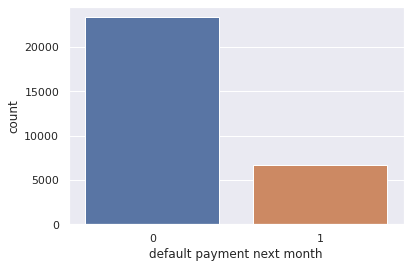

In [12]:
print("Probability of Default")
print(sum(defaultData['default payment next month'])/ defaultData.shape[0])
ax = sns.countplot(x="default payment next month", data=defaultData)
len(defaultData.columns)

In [13]:
## select Featres to train, test
defaultDataCorr = defaultData.copy()
defaultDataCorr.drop(['index',  'level_0'], axis=1, inplace = True)

In [14]:
minMaxCol = ['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
             
for col in minMaxCol:
  min_max_scaler = preprocessing.StandardScaler()
  defaultDataCorr[col] = min_max_scaler.fit_transform( defaultDataCorr[[col]])



defaultDataCorr = defaultDataCorr.fillna(0.0)

In [15]:
val = defaultDataCorr['default payment next month']
defaultDataCorr.drop(columns = ['default payment next month'], inplace = True)
defaultDataCorr['default payment next month'] = val

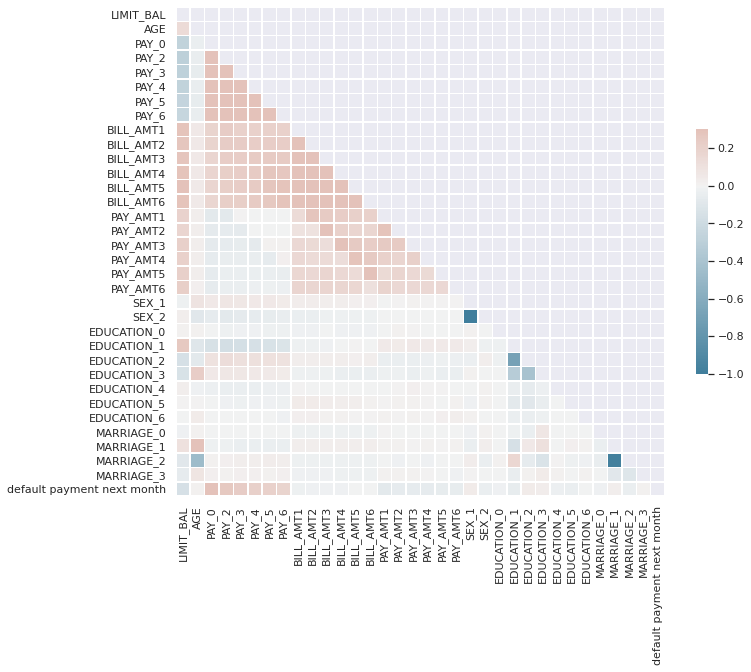

In [16]:
# test_corr = 
corrplot = defaultDataCorr[[]]
corr = defaultDataCorr.corr()
# corr = corr.drop(['SEX_1', 'SEX_2', 'EDUCATION_0', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_4','EDUCATION_3' ,'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0','MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3' ])
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
## select Featres to train, test
defaultRun = defaultDataCorr.copy()


defaultPred = defaultRun['default payment next month']
defaultRun.drop(['default payment next month'], axis = 1, inplace = True)

In [18]:
defaultDataCorr.columns



Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_0',
       'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_0', 'MARRIAGE_1', 'MARRIAGE_2',
       'MARRIAGE_3', 'default payment next month'],
      dtype='object')

In [19]:
pairCredit = defaultCredit.copy()
pairCredit.drop(columns = ['ID'], inplace = True)
# sns.pairplot(pairCredit)


In [20]:
pairCredit.shape

(30000, 24)

In [21]:
# defaultDataCorr.describe()

#Process Housing Data

In [22]:
data = pd.read_csv("/content/gdrive/MyDrive/ML/kc_house_data.csv")
data['year'] = data['date'].str[:4]
data = data[data['year'] == '2015']
data.shape
data.head(10)


relev_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [23]:
data_rel = data[relev_cols]
data_rel['yr_renovated'] =  data['yr_renovated'].apply(lambda x:  0 if x == 0 else 2015 - x)
standard_cols =  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                  'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',  'sqft_living15', 'sqft_lot15']

for col in standard_cols:
  min_max_scaler = preprocessing.StandardScaler()
  data_rel[col] = min_max_scaler.fit_transform( data_rel[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [24]:
data_rel.shape

(6980, 16)

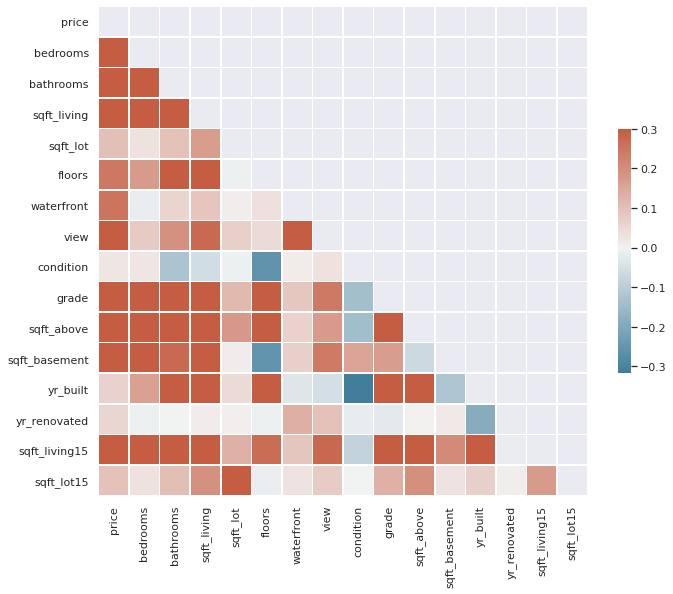

In [25]:
# test_corr = 
corr = data_rel.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
data_rel

price  bedrooms  bathrooms  ...  yr_renovated  sqft_living15  sqft_lot15
2       180000.0 -1.503440  -1.416145  ...     -0.149087       1.123266   -0.158584
4       510000.0 -0.396009  -0.111063  ...     -0.149087      -0.245454   -0.177433
7       291850.0 -0.396009  -0.763604  ...     -0.149087      -0.468615   -0.102982
8       229500.0 -0.396009  -1.416145  ...     -0.149087      -0.275209   -0.156865
9       323000.0 -0.396009   0.541478  ...     -0.149087       0.632312   -0.175174
...          ...       ...        ...  ...           ...            ...         ...
21604   429000.0 -0.396009  -0.111063  ...     -0.149087      -0.840550   -0.388954
21606  1010000.0  0.711421   1.846560  ...     -0.149087       0.126481   -0.221369
21607   475000.0 -0.396009   0.541478  ...     -0.149087      -0.944691   -0.387773
21609   400000.0  0.711421   0.541478  ...     -0.149087      -0.200822   -0.187650
21611   400000.0 -0.396009   0.541478  ...     -0.149087      -0.825672   -0.387032

[6980 rows x 16 columns]

In [27]:
# sns.pairplot(data_rel)


# Train Test split data

In [28]:

default = defaultDataCorr['default payment next month']
defaultDataCorr.drop(columns = 'default payment next month', inplace = True)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(defaultDataCorr, default, test_size=0.25, random_state=1, shuffle = True)

In [29]:
data_house = data_rel.copy()
price = data_house['price']
data_house.drop(columns = 'price', inplace = True)
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(data_house, price, test_size=0.25, random_state=1, shuffle = True)

# Clustering

##Credit Card

In [110]:
clusters = list(range(2,11,1))
inert = []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_def)
    prediction=model.predict(X_train_def)
    sil=davies_bouldin_score(X_train_def, prediction)
    inert.append(sil)
    print(k)

# plt.figure(figsize=(1,1))
# plt.plot(clusters, inert, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Average dnertia')
# plt.title('Selecting k with the Elbow Method')

2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Default Data k-Means D-B Score')

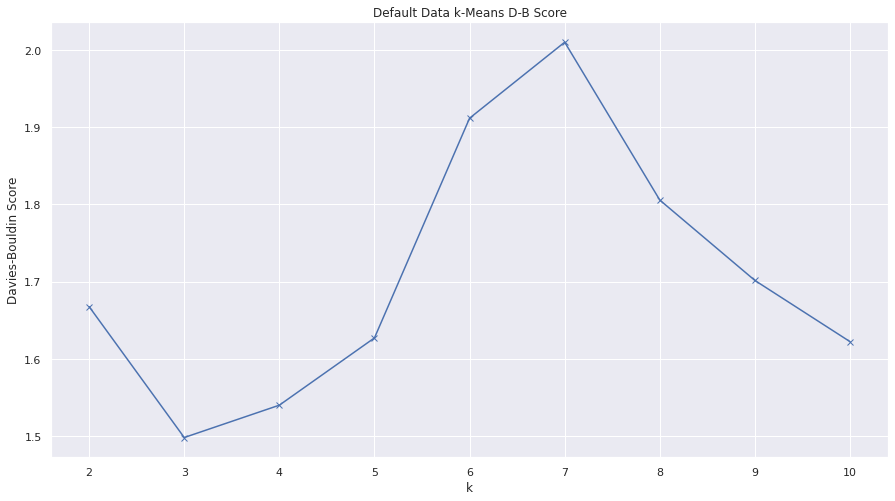

In [112]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Default Data k-Means D-B Score')

### Cluster Eval

In [120]:
model=KMeans(n_clusters=3)
model.fit(X_train_def)
prediction=model.predict(X_train_def)

print(homogeneity_completeness_v_measure(y_train_def, prediction))
# print(completeness_score(y_train_def, prediction))



(0.013543089232409754, 0.0074573406146116695, 0.009618415443480443)


In [57]:
clf = LogisticRegression(random_state=0).fit(X_train_def, y_train_def)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [115]:
# zip(list_a, list_b)
sorted(list(zip(clf.coef_[0], list(X_train_def.columns))), key =  lambda tup: tup[0])
# sorted(data, key=lambda tup: tup[1])
# clf.coef_

[(-0.5274376463710876, 'EDUCATION_5'),
 (-0.46907233981124297, 'SEX_2'),
 (-0.4039014185861706, 'SEX_1'),
 (-0.3691738172189539, 'MARRIAGE_2'),
 (-0.32767060232354644, 'BILL_AMT1'),
 (-0.20901134524330106, 'EDUCATION_4'),
 (-0.1888597742988798, 'MARRIAGE_1'),
 (-0.1826205948335072, 'MARRIAGE_3'),
 (-0.18140680919611227, 'PAY_AMT1'),
 (-0.16273793645738638, 'PAY_AMT2'),
 (-0.13231957204603093, 'MARRIAGE_0'),
 (-0.09263324818462068, 'LIMIT_BAL'),
 (-0.08254242477312773, 'EDUCATION_3'),
 (-0.051861578988198515, 'EDUCATION_6'),
 (-0.05008669437746209, 'PAY_AMT4'),
 (-0.04951509185123038, 'EDUCATION_2'),
 (-0.047880150617734436, 'PAY_AMT5'),
 (-0.043030125983462834, 'PAY_AMT3'),
 (-0.04189887117020965, 'PAY_AMT6'),
 (-0.037364755667683776, 'BILL_AMT6'),
 (-0.03574630314646109, 'EDUCATION_0'),
 (-0.020640714556321483, 'BILL_AMT5'),
 (0.006042774470640138, 'AGE'),
 (0.006943762047237003, 'PAY_6'),
 (0.03350478458719676, 'PAY_4'),
 (0.036855470707631406, 'PAY_5'),
 (0.05545179991478489, 'PAY_3

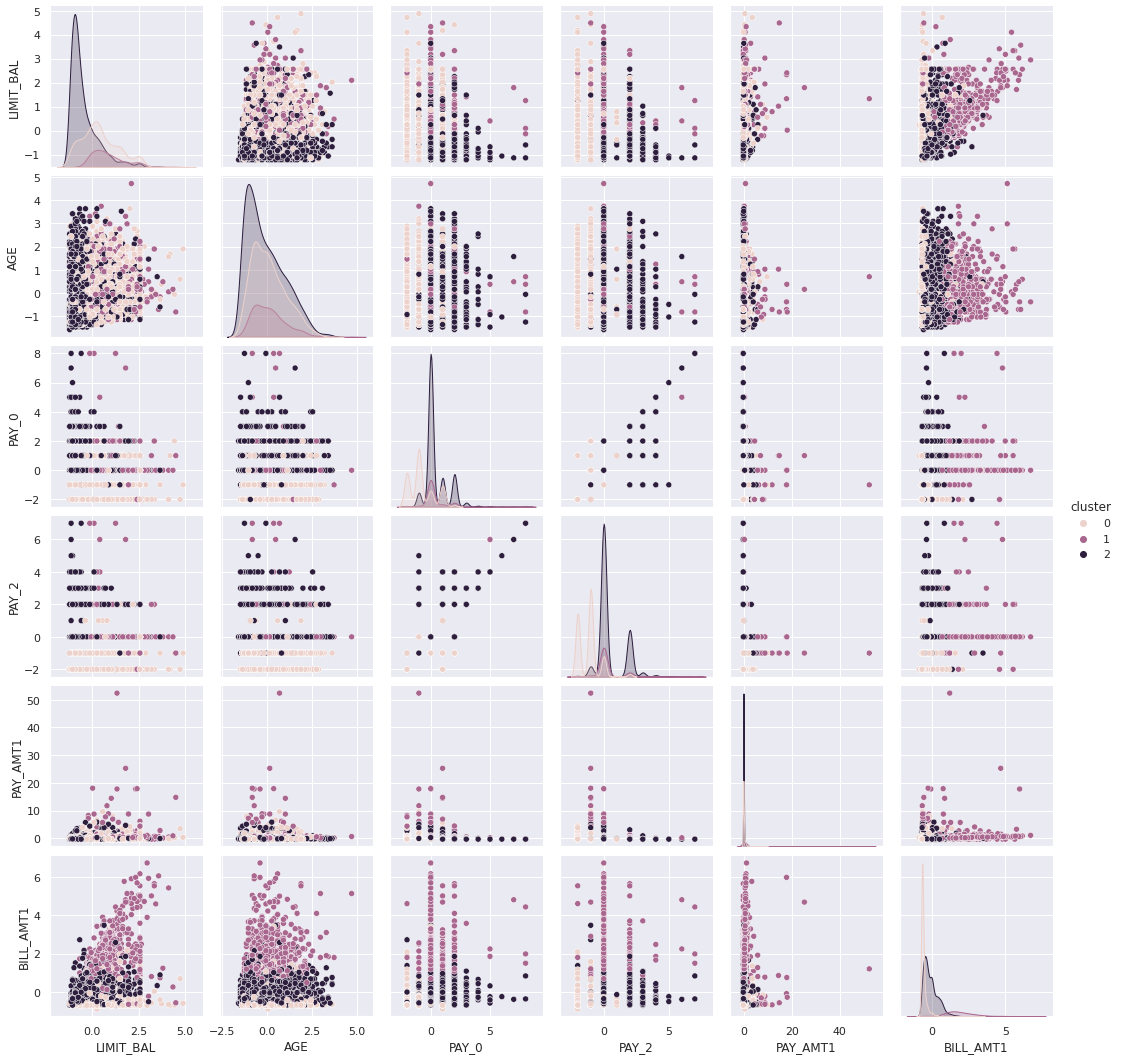

In [121]:
x_train_def_cluster = X_train_def.copy()
x_train_def_cluster['cluster'] =  prediction
x_train_def_cluster = x_train_def_cluster.sample(5000)
selectcol = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_AMT1', 'BILL_AMT1', 'cluster']
# sns.pairplot()
sns.pairplot(x_train_def_cluster[selectcol], hue = 'cluster')

In [116]:
adjusted_mutual_info_score(y_train_def, prediction)  

0.009480946736130752

In [ ]:
#Set our perplexity

def setuptsne(prediction, X_train_def):
  perplexity = 50

  kclusters = X_train_def.copy()
  kclusters['Cluster'] = prediction
  plotX = pd.DataFrame(np.array(kclusters.sample(5000)))
  plotX.columns = kclusters.columns

  tsne_2d = TSNE(n_components=2, perplexity=perplexity)
  TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
  TCs_2d.columns = ["TC1_2d","TC2_2d"]
  plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')
  return plotX



In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [ ]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)



data = [trace1, trace2]

title = "Visualizing K-Means(Credit Card Default) in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#Rename the columns of these newly created DataFrames:

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

In [117]:
#Gaussian Mixture elbow plot

inert = []
for k in clusters:
    model=GaussianMixture(n_components=k, covariance_type = 'spherical')
    model.fit(X_train_def)
    prediction=model.predict(X_train_def)
    sil=davies_bouldin_score(X_train_def, prediction)
    inert.append(sil)
    print(k)



2
3
4
5
6
7
8
9
10


Text(0.5, 1.0, 'Default Data GMM D-B Score')

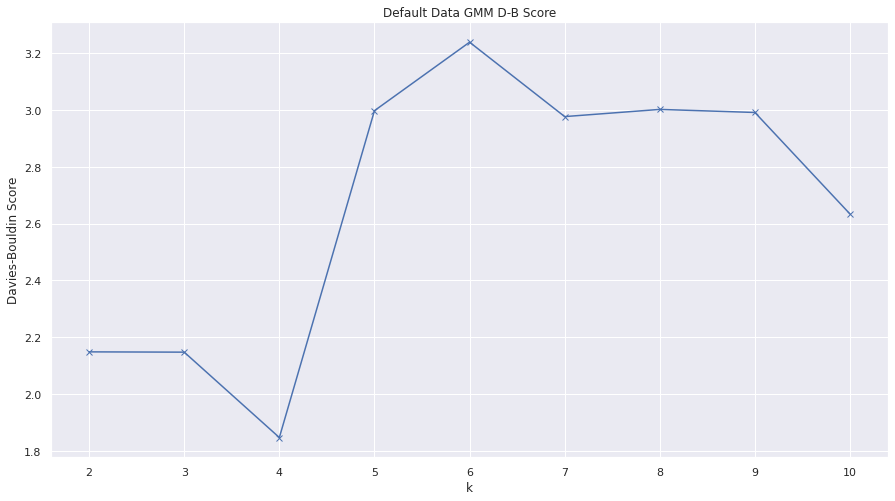

In [118]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Default Data GMM D-B Score')

### GMM Eval

In [86]:
model=GaussianMixture(n_components=2)
model.fit(X_train_def)
prediction=model.predict(X_train_def)

print(homogeneity_completeness_v_measure(y_train_def, prediction))

(0.008200267499114254, 0.010681526687143584, 0.009277865786425536)


In [122]:
adjusted_mutual_info_score(y_train_def, prediction)  

0.009559183254410197

In [89]:
# X_train_def.describe()

In [ ]:
#Set our perplexity

plotX = setuptsne(prediction, X_train_def)

In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [ ]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)



data = [trace1, trace2]

title = "Visualizing GMM(Credit Card Default) in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### True Plot

In [ ]:
plotX = setuptsne(y_train_def, X_train_def)
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [ ]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)



data = [trace1, trace2]

title = "Visualizing True-Labels in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## Housing Data

### Kmean housing

In [ ]:
clusters = list(range(2,16,1))
inert = []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_house)
    prediction=model.predict(X_train_house)
    sil=davies_bouldin_score(X_train_house, prediction)
    inert.append(sil)
    print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15


Text(0.5, 1.0, 'Housing Data k-Means D-B Score')

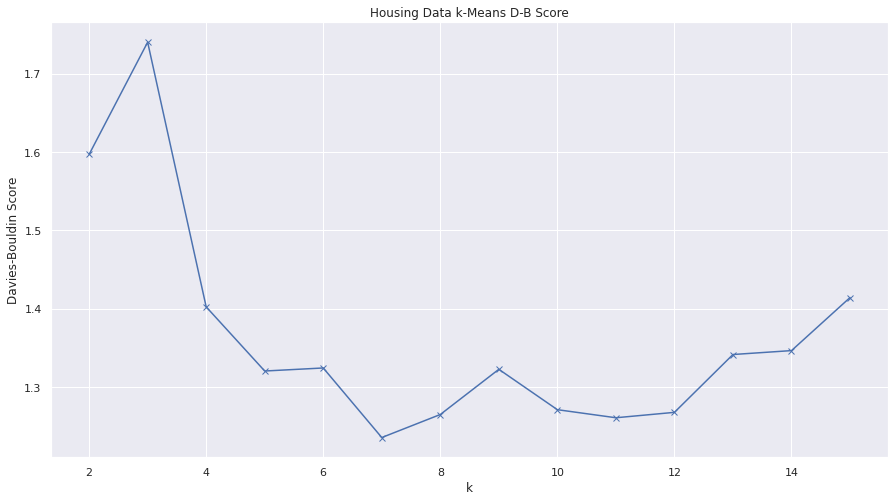

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Housing Data k-Means D-B Score')

In [ ]:
#cluster evaluation

In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_house, y_train_house)

In [132]:
X_train_house.describe()

bedrooms    bathrooms  ...  sqft_living15   sqft_lot15
count  5235.000000  5235.000000  ...    5235.000000  5235.000000
mean      0.012270     0.004550  ...       0.001169    -0.000216
std       1.001954     1.005640  ...       1.003053     1.027129
min      -3.718300    -2.721226  ...      -2.329776    -0.405206
25%      -0.396009    -0.763604  ...      -0.721530    -0.257786
50%      -0.396009     0.215208  ...      -0.215699    -0.173488
75%       0.711421     0.541478  ...       0.543048    -0.092663
max       6.248571     5.761805  ...       6.315475    28.945684

[8 rows x 15 columns]

In [131]:
sorted(list(zip(reg.coef_, list(X_train_house.columns))), key =  lambda tup: tup[0])


[(-114556.87713359238, 'yr_built'),
 (-30660.38841653788, 'bedrooms'),
 (-16556.72872431317, 'sqft_lot15'),
 (-12210.374365214835, 'yr_renovated'),
 (10117.830093958939, 'condition'),
 (12789.084365349438, 'sqft_lot'),
 (22599.635439201207, 'floors'),
 (28914.62679923718, 'view'),
 (35346.386612562914, 'sqft_basement'),
 (40636.97712453159, 'bathrooms'),
 (41146.177763589905, 'sqft_living15'),
 (41653.105061715934, 'sqft_above'),
 (49633.68923723957, 'waterfront'),
 (54879.45867828833, 'sqft_living'),
 (144909.9698093604, 'grade')]

In [264]:
 model=KMeans(n_clusters=9)
model.fit(X_train_house)
prediction=model.predict(X_train_house)

In [272]:
import collections, numpy
a = numpy.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
collections.Counter(x_train_def_cluster['cluster'])

Counter({0: 1229,
         1: 1159,
         2: 792,
         3: 37,
         4: 274,
         5: 58,
         6: 952,
         7: 72,
         8: 662})

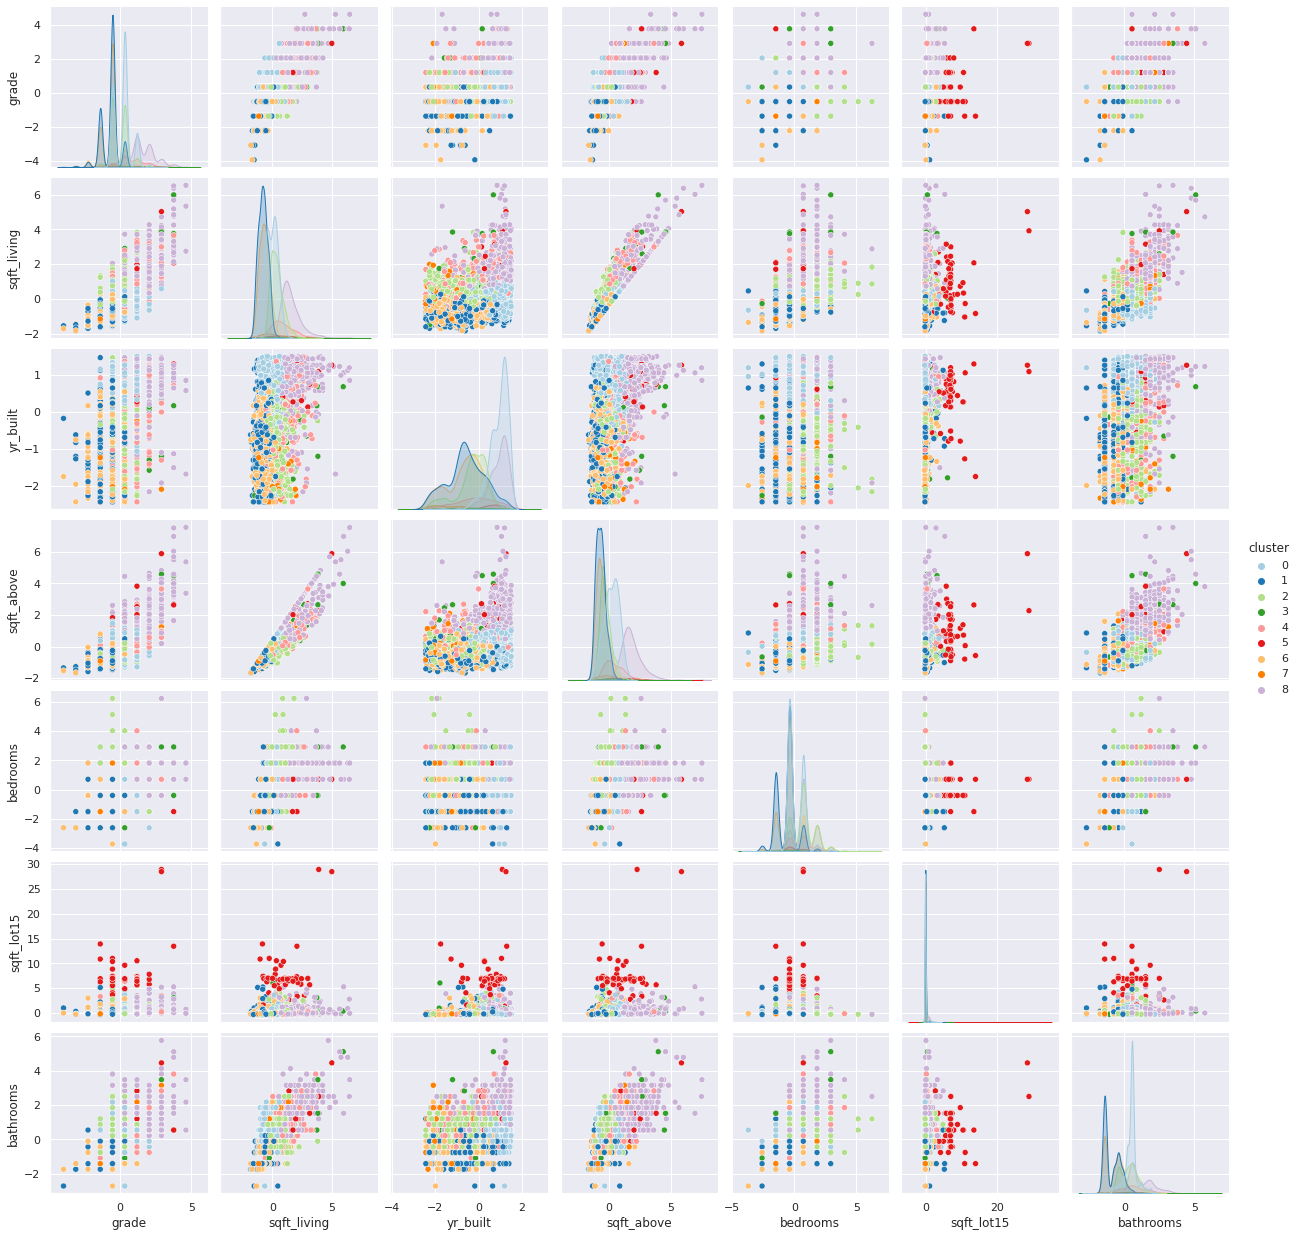

In [274]:
x_train_def_cluster = X_train_house.copy()
x_train_def_cluster['cluster'] =  prediction
# x_train_def_cluster = x_train_def_cluster.sample(5000)
selectcol = ['grade', 'sqft_living', 'yr_built', 'sqft_above','bedrooms', 'sqft_lot15', 'bathrooms', 'cluster']
# sns.pairplot()
sns.pairplot(x_train_def_cluster[selectcol], hue = 'cluster', palette=  'Paired')

In [ ]:
# errorCalc.shape[0]

In [ ]:
#calculate MSE of each cluster and wieghted average them

def calcAvgRMSE(prediction, X_train_house, y_train_house, n):
  errorCalc = X_train_house.copy()
  errorCalc['cluster'] = prediction
  errorCalc['price'] = y_train_house

  cumul = 0
  for i in range(0,n):
    assign = errorCalc[errorCalc['cluster'] == i]
    meanCluster = np.mean(assign['price'])
    val = list((assign['price']))
    clusterSize = len(val)
    val = np.asarray(assign['price'])
    SSE = (sum((val - meanCluster)**2)/clusterSize)**(0.5)
    cumul = cumul + SSE * (clusterSize/errorCalc.shape[0])
  return cumul

calcAvgRMSE(prediction, X_train_house, y_train_house,9)




In [ ]:
# val

In [ ]:

plotX = setuptsne(prediction, X_train_house)

In [ ]:
rgblist = ['rgba(246, 189, 96, 0.8)',
           'rgba(152, 95, 153, 0.8)',
           'rgba(245, 202, 195, 0.8)',
           'rgba(189, 184, 176, 0.8)',
           'rgba(40, 56, 69, 0.8)',
           'rgba(132, 165, 157, 0.8)',
           'rgba(242, 132, 130, 0.8)',
           'rgba(217, 193, 186, 0.8)'
]

In [ ]:
data = []
for i in range(0, 8):
  cCluster =  plotX[plotX["Cluster"] == i]
  print(cCluster.shape)
  trace1 = go.Scatter(
                      x = cCluster["TC1_2d"],
                      y = cCluster["TC2_2d"],
                      mode = "markers",
                      name = "Cluster " + str(i),
                      marker = dict(color = rgblist[i]),
                    text = None)

  data.append(trace1)


In [ ]:


title = "Visualizing K-Means(Houusing Data) in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

### GMM

In [ ]:
#Gaussian Mixture elbow plot

inert = []
for k in clusters:
    model=GaussianMixture(n_components=k)
    model.fit(X_train_house)
    prediction=model.predict(X_train_house)
    sil=davies_bouldin_score(X_train_house, prediction)
    inert.append(sil)
    print(k)

2
3
4
5
6
7
8
9
10
11
12
13
14
15


Text(0.5, 1.0, 'Housing Data k-Means D-B Score')

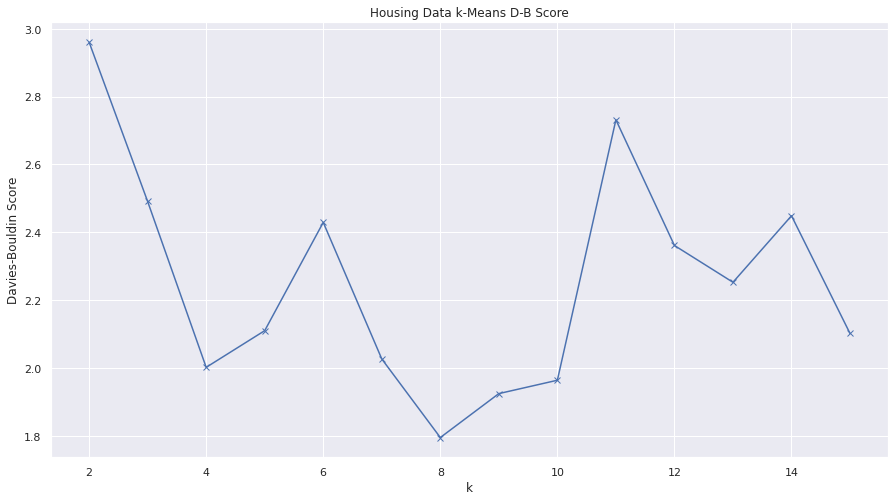

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Housing Data k-Means D-B Score')

In [ ]:
#Evaluation

In [ ]:
model=GaussianMixture(n_components=10)
model.fit(X_train_house)
prediction=model.predict(X_train_house)

In [ ]:
calcAvgRMSE(prediction, X_train_house, y_train_house,10)


In [ ]:
plotX = setuptsne(prediction, X_train_house)

In [ ]:
rgblist = ['rgba(246, 189, 96, 0.8)',
           'rgba(152, 95, 153, 0.8)',
           'rgba(245, 202, 195, 0.8)',
           'rgba(189, 184, 176, 0.8)',
           'rgba(40, 56, 69, 0.8)',
           'rgba(132, 165, 157, 0.8)',
           'rgba(242, 132, 130, 0.8)',
           'rgba(217, 193, 186, 0.8)',
           'rgba(139, 87, 92,0.8)',
           'rgba(220, 237, 49, 0.8)'

]

In [ ]:
data = []
for i in range(0, 10):
  cCluster =  plotX[plotX["Cluster"] == i]
  print(cCluster.shape)
  trace1 = go.Scatter(
                      x = cCluster["TC1_2d"],
                      y = cCluster["TC2_2d"],
                      mode = "markers",
                      name = "Cluster " + str(i),
                      marker = dict(color = rgblist[i]),
                    text = None)

  data.append(trace1)


In [ ]:


title = "Visualizing GMM(Houusing Data) in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

# Dimensionality Reduction


## PCA

In [173]:
pca = PCA(n_components = 0.99)
pca.fit(X_train_def)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [169]:
X_train_def.shape

(22500, 33)

In [170]:
pca.explained_variance_

array([7.31871416, 4.7727477 , 1.52425915, 1.17471171, 0.96532603,
       0.89788138, 0.86294811, 0.80129637, 0.75269321, 0.65899283,
       0.63228898, 0.53851545, 0.48899461, 0.38280984, 0.355759  ,
       0.30130424, 0.26301684, 0.24393132, 0.17799661, 0.17557116])

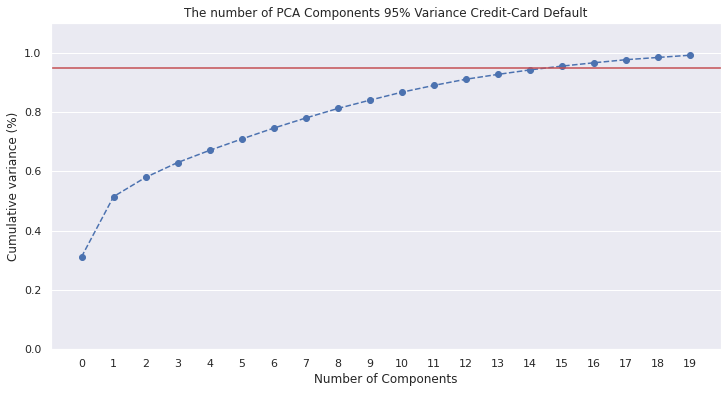

In [171]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 20, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of PCA Components 95% Variance Credit-Card Default')

plt.axhline(y=0.95, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

In [174]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_def)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[Text(0, 0, 'LIMIT_BAL'),
 Text(0, 0, 'AGE'),
 Text(0, 0, 'PAY_0'),
 Text(0, 0, 'PAY_2'),
 Text(0, 0, 'PAY_3'),
 Text(0, 0, 'PAY_4'),
 Text(0, 0, 'PAY_5'),
 Text(0, 0, 'PAY_6'),
 Text(0, 0, 'BILL_AMT1'),
 Text(0, 0, 'BILL_AMT2'),
 Text(0, 0, 'BILL_AMT3'),
 Text(0, 0, 'BILL_AMT4'),
 Text(0, 0, 'BILL_AMT5'),
 Text(0, 0, 'BILL_AMT6'),
 Text(0, 0, 'PAY_AMT1'),
 Text(0, 0, 'PAY_AMT2'),
 Text(0, 0, 'PAY_AMT3'),
 Text(0, 0, 'PAY_AMT4'),
 Text(0, 0, 'PAY_AMT5'),
 Text(0, 0, 'PAY_AMT6'),
 Text(0, 0, 'SEX_1'),
 Text(0, 0, 'SEX_2'),
 Text(0, 0, 'EDUCATION_0'),
 Text(0, 0, 'EDUCATION_1'),
 Text(0, 0, 'EDUCATION_2'),
 Text(0, 0, 'EDUCATION_3'),
 Text(0, 0, 'EDUCATION_4'),
 Text(0, 0, 'EDUCATION_5'),
 Text(0, 0, 'EDUCATION_6'),
 Text(0, 0, 'MARRIAGE_0'),
 Text(0, 0, 'MARRIAGE_1'),
 Text(0, 0, 'MARRIAGE_2'),
 Text(0, 0, 'MARRIAGE_3')]

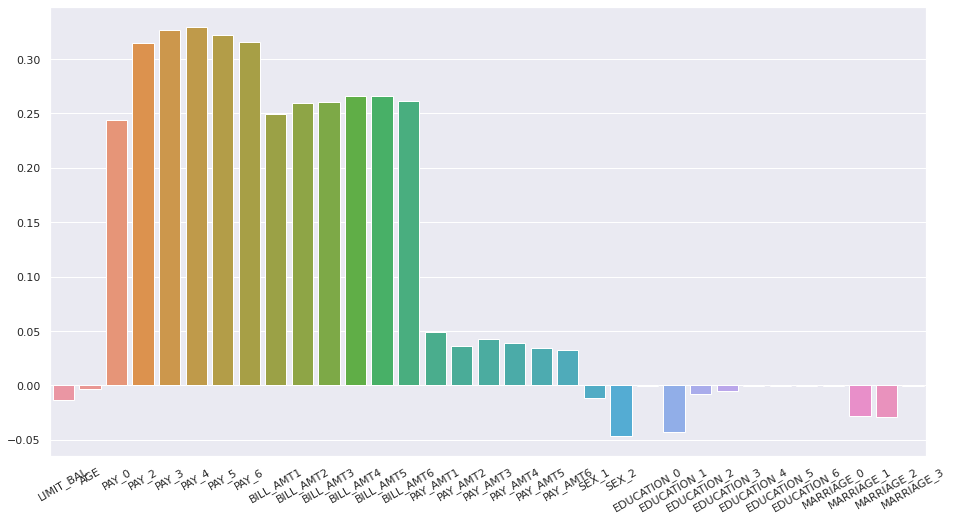

In [244]:
defaultComp = pd.DataFrame(data = svd.components_ *100, columns = X_train_def.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_def.columns, y=svd.components_[0])
ax.set_xticklabels(rotation=30, labels= X_train_def.columns)



####  PCA - Clustering Credit Card


In [219]:
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(X_train_def)

In [195]:
x_train_pca.shape

(22500, 16)

0.00959045101552004

#### ICA -Cluster Credit Card

In [199]:
transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=20)
x_train_pca = transformer.fit_transform(X_train_def)

#### RP Credit Card

In [216]:
transformer = GaussianRandomProjection(n_components = 21)
x_train_pca = transformer.fit_transform(X_train_def)

#### SVD Default Data

In [242]:
svd = TruncatedSVD(n_components=16, n_iter=7)
x_train_pca = svd.fit_transform(X_train_def)
model= KMeans(n_clusters=3)
model.fit(x_train_pca)
prediction=model.predict(x_train_pca)
adjusted_mutual_info_score(y_train_def, prediction)  

0.009654291902641252

In [217]:
clusters = list(range(2,10,1))
# GaussianMixture(n_components=k, covariance_type= 'spherical')
# KMeans(n_clusters=k)
# Kmeans(n)
inert = []
for k in clusters:
    model= KMeans(n_clusters=k)
    model.fit(x_train_pca)
    prediction=model.predict(x_train_pca)
    sil=davies_bouldin_score(x_train_pca, prediction)
    inert.append(sil)
    print(k, sil)

2 1.369919922082015
3 1.7806186309137966
4 1.712177369689333
5 1.651864573066015
6 1.702179365026258
7 1.6917163151966501
8 1.6312619621580886
9 1.616578200732942


Text(0.5, 1.0, 'Default Data GMM D-B Score SVD')

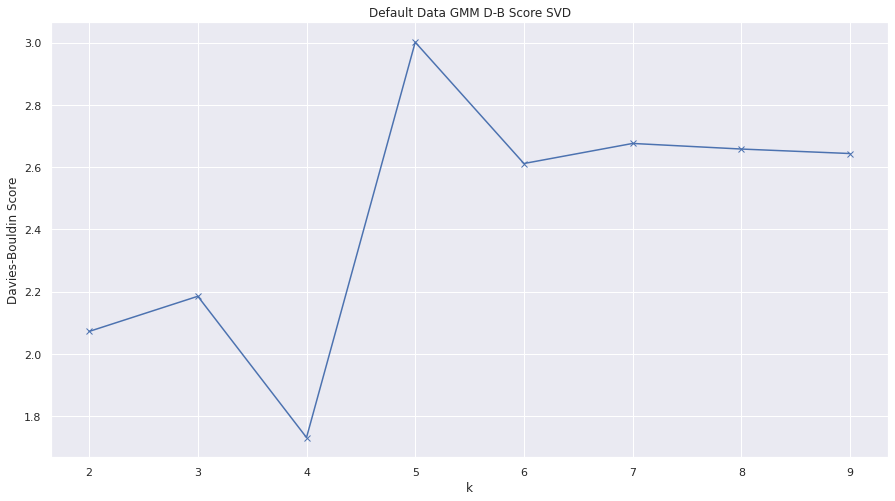

In [215]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Default Data GMM D-B Score SVD')

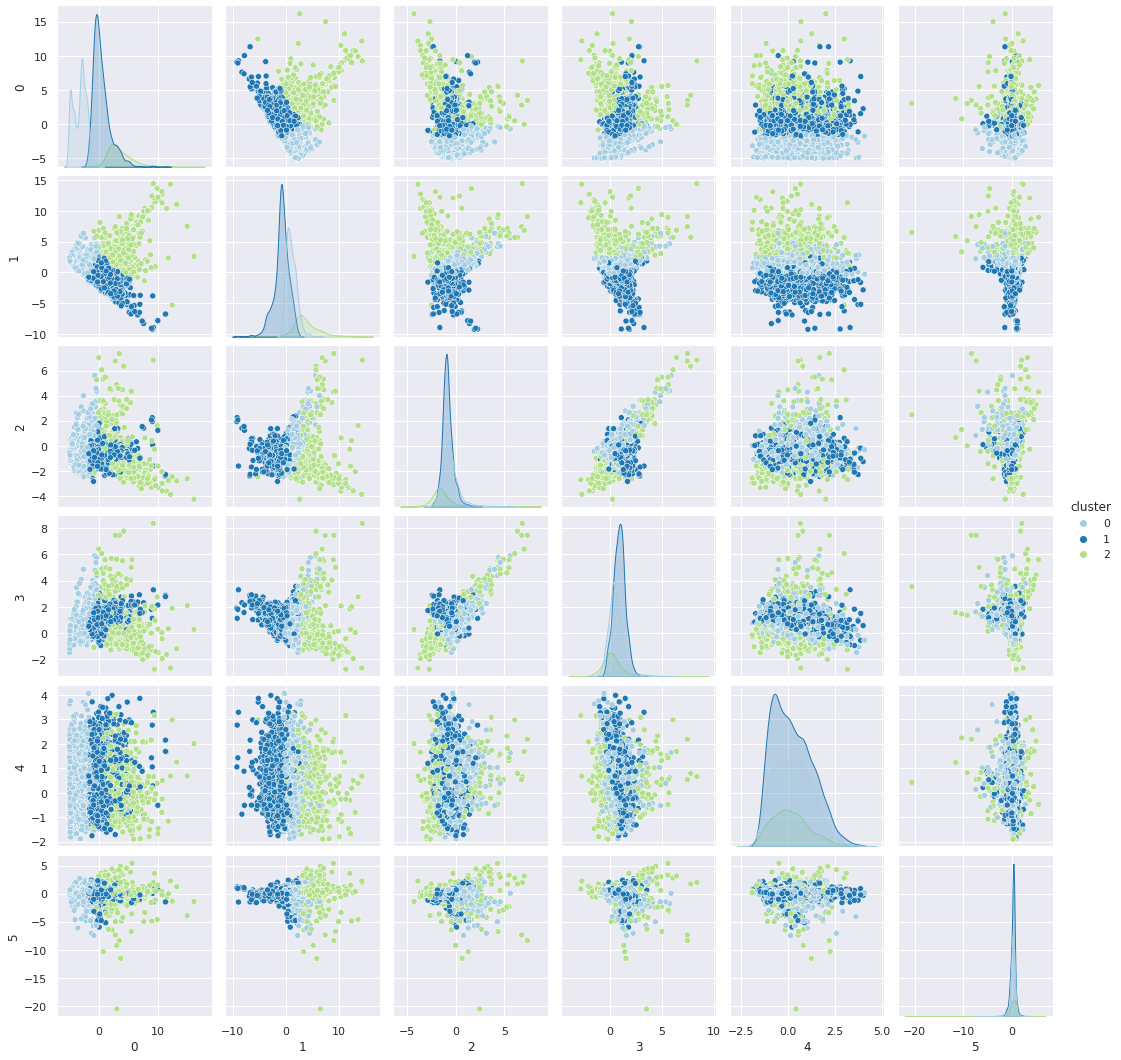

In [243]:
x_train_def_cluster = pd.DataFrame(x_train_pca.copy())
x_train_def_cluster['cluster'] =  prediction
x_train_def_cluster = x_train_def_cluster.sample(5000)
selectcol = [0, 1, 2, 3,4, 5, 'cluster']
# sns.pairplot()
sns.pairplot(x_train_def_cluster[selectcol], hue = 'cluster', palette=  'Paired')

In [ ]:
def setuptsne(prediction, X_train):
  perplexity = 50

  kclusters = pd.DataFrame(X_train.copy())
  kclusters['Cluster'] = prediction
  plotX = pd.DataFrame(np.array(kclusters.sample(5000)))
  plotX.columns = kclusters.columns

  tsne_2d = TSNE(n_components=2, perplexity=perplexity)
  TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
  TCs_2d.columns = ["TC1_2d","TC2_2d"]
  plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')
  return plotX

In [ ]:
model=GaussianMixture(n_components= 4)
model.fit(x_train_pca)
prediction=model.predict(x_train_pca)
plotX = setuptsne(prediction, X_train_def)

In [ ]:
rgblist = ['rgba(246, 189, 96, 0.8)',
           'rgba(152, 95, 153, 0.8)',
           'rgba(245, 202, 195, 0.8)',
           'rgba(189, 184, 176, 0.8)',
           'rgba(40, 56, 69, 0.8)',
           'rgba(132, 165, 157, 0.8)',
           'rgba(242, 132, 130, 0.8)',
           'rgba(217, 193, 186, 0.8)',
          'rgba(150, 280, 200, 0.8)',
          'rgba(30, 180, 153, 0.8)',
            'rgba(240, 30, 269, 0.8)',  
          'rgba(182, 20, 153, 0.8)',
                 'rgba(200, 30, 20, 0.8)'
]

In [ ]:
data = []
for i in range(0, 4):
  cCluster =  plotX[plotX["Cluster"] == i]
  print(cCluster.shape)
  trace1 = go.Scatter(
                      x = cCluster["TC1_2d"],
                      y = cCluster["TC2_2d"],
                      mode = "markers",
                      name = "Cluster " + str(i),
                      marker = dict(color = rgblist[i]),
                    text = None)

  data.append(trace1)


(1272, 36)
(2002, 36)
(1280, 36)
(446, 36)


In [ ]:


title = "Visualizing GMM(Credit Card) SVD Using T-SNE (perplexity=" + str(50) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [ ]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)



data = [trace1, trace2]

title = "Visualizing K-Means(Credit Card Default) PCA in Two Dimensions Using T-SNE (perplexity=" + str(0.5) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
#GMM
#Gaussian Mixture elbow plot

inert = []
for k in clusters:
    model=GaussianMixture(n_components=k)
    model.fit(x_train_pca)
    prediction=model.predict(x_train_pca)
    sil=davies_bouldin_score(x_train_pca, prediction)
    inert.append(sil)
    print(k)


2
3
4
5
6
7
8
9


Text(0.5, 1.0, 'Default Data GMM PCA D-B Score')

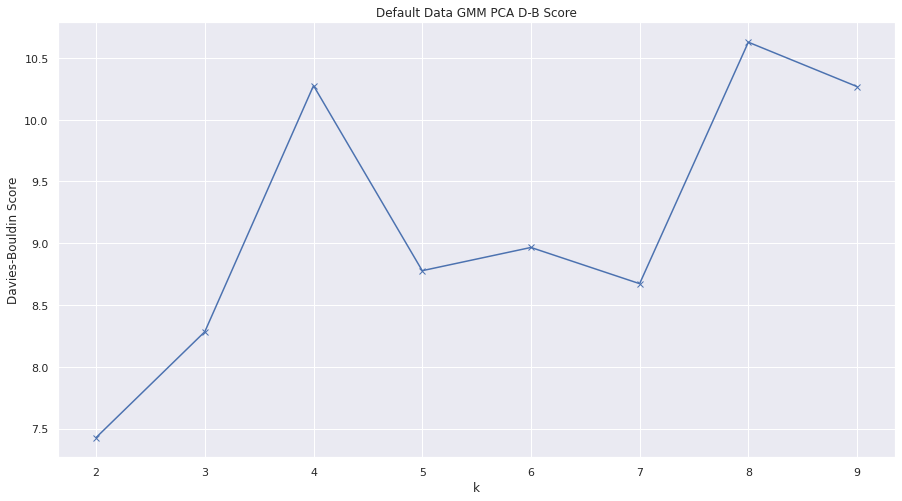

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Default Data GMM PCA D-B Score')

In [ ]:
model=GaussianMixture(n_components=2)
model.fit(x_train_pca)
prediction=model.predict(x_train_pca)
sil=davies_bouldin_score(x_train_pca, prediction)
plotX = setuptsne(prediction, X_train_def)

In [ ]:
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]

In [ ]:
#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)



data = [trace1, trace2]

title = "Visualizing GMM(Credit Card Default) PCA in Two Dimensions Using T-SNE (perplexity=" + str(50) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [ ]:
from sklearn import metrics
metrics.adjusted_mutual_info_score(y_train_def, y_train_def)  

1.0

###PCA Housing

In [ ]:
## Housing

In [245]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_house)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

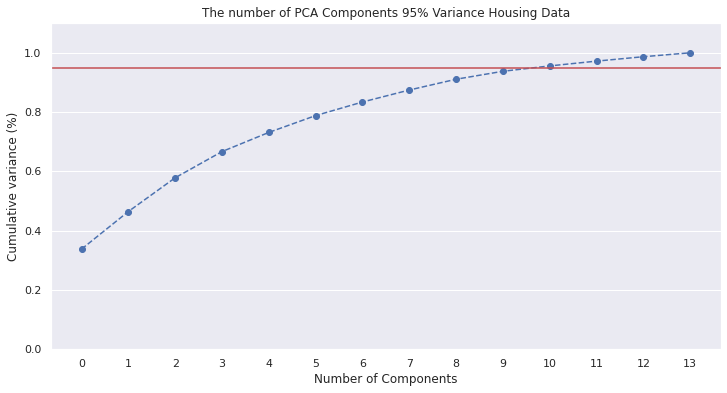

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of PCA Components 95% Variance Housing Data')

plt.axhline(y=0.95, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

[Text(0, 0, 'bedrooms'),
 Text(0, 0, 'bathrooms'),
 Text(0, 0, 'sqft_living'),
 Text(0, 0, 'sqft_lot'),
 Text(0, 0, 'floors'),
 Text(0, 0, 'waterfront'),
 Text(0, 0, 'view'),
 Text(0, 0, 'condition'),
 Text(0, 0, 'grade'),
 Text(0, 0, 'sqft_above'),
 Text(0, 0, 'sqft_basement'),
 Text(0, 0, 'yr_built'),
 Text(0, 0, 'yr_renovated'),
 Text(0, 0, 'sqft_living15'),
 Text(0, 0, 'sqft_lot15')]

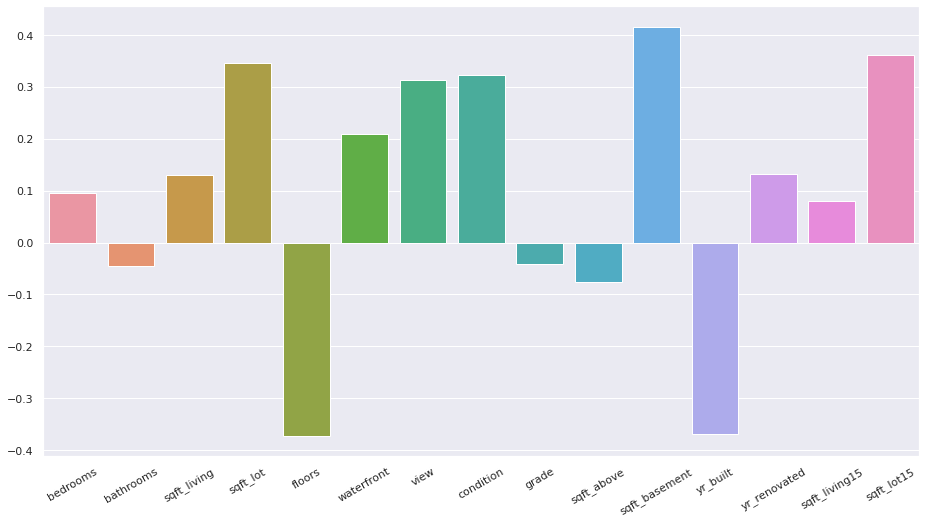

In [247]:
defaultComp = pd.DataFrame(data = pca.components_ *100, columns = X_train_house.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_house.columns, y=pca.components_[1])
ax.set_xticklabels(rotation=30, labels= X_train_house.columns)


#### PCA housing Clustering

In [252]:
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(X_train_house)
x_train_pca.shape

(5235, 11)

#### ICA Housing Clusering

In [258]:
transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=11)
x_train_pca = transformer.fit_transform(X_train_house)

#### RP Housing

In [262]:
transformer = GaussianRandomProjection(n_components = 12)
x_train_pca = transformer.fit_transform(X_train_house)

#### SVD Housing

In [ ]:
svd = TruncatedSVD(n_components=9, n_iter=7)
x_train_pca = svd.fit_transform(X_train_house)

In [261]:
#  model=GaussianMixture(n_components=k)
# model = KMeans(n_clusters=k)
clusters = list(range(2,10,1))
inert = []
for k in clusters:
    model=GaussianMixture(n_components=k)
    model.fit(x_train_pca)
    prediction=model.predict(x_train_pca)
    sil=davies_bouldin_score(x_train_pca, prediction)
    inert.append(sil)
    print(k, sil)

2 2.5745175841757373
3 3.1166630291986017
4 2.770408129889927
5 2.300863772305842
6 1.7965916837620093
7 2.4959475007337453
8 2.1843609385626004
9 2.1772878430349976


Text(0.5, 1.0, 'Housing Data GMM SVD D-B Score')

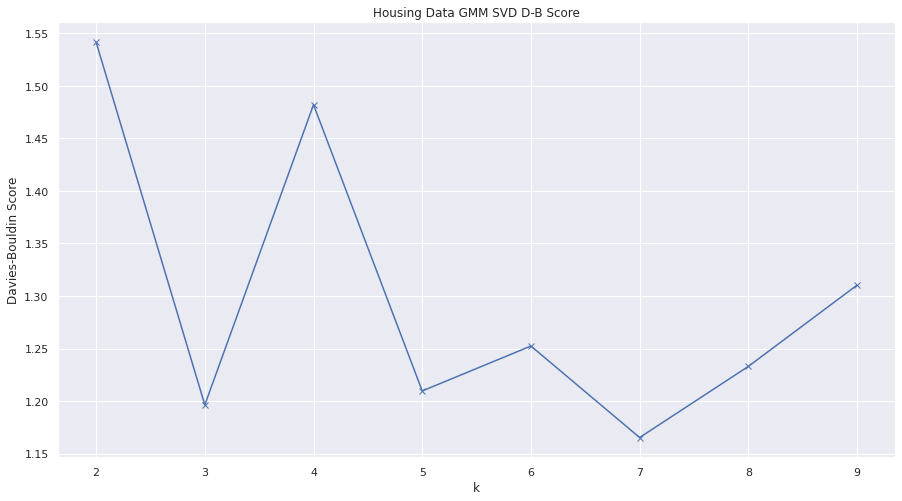

In [257]:
plt.figure(figsize=(15,8))
plt.plot(clusters, inert, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin Score')
plt.title('Housing Data GMM SVD D-B Score')

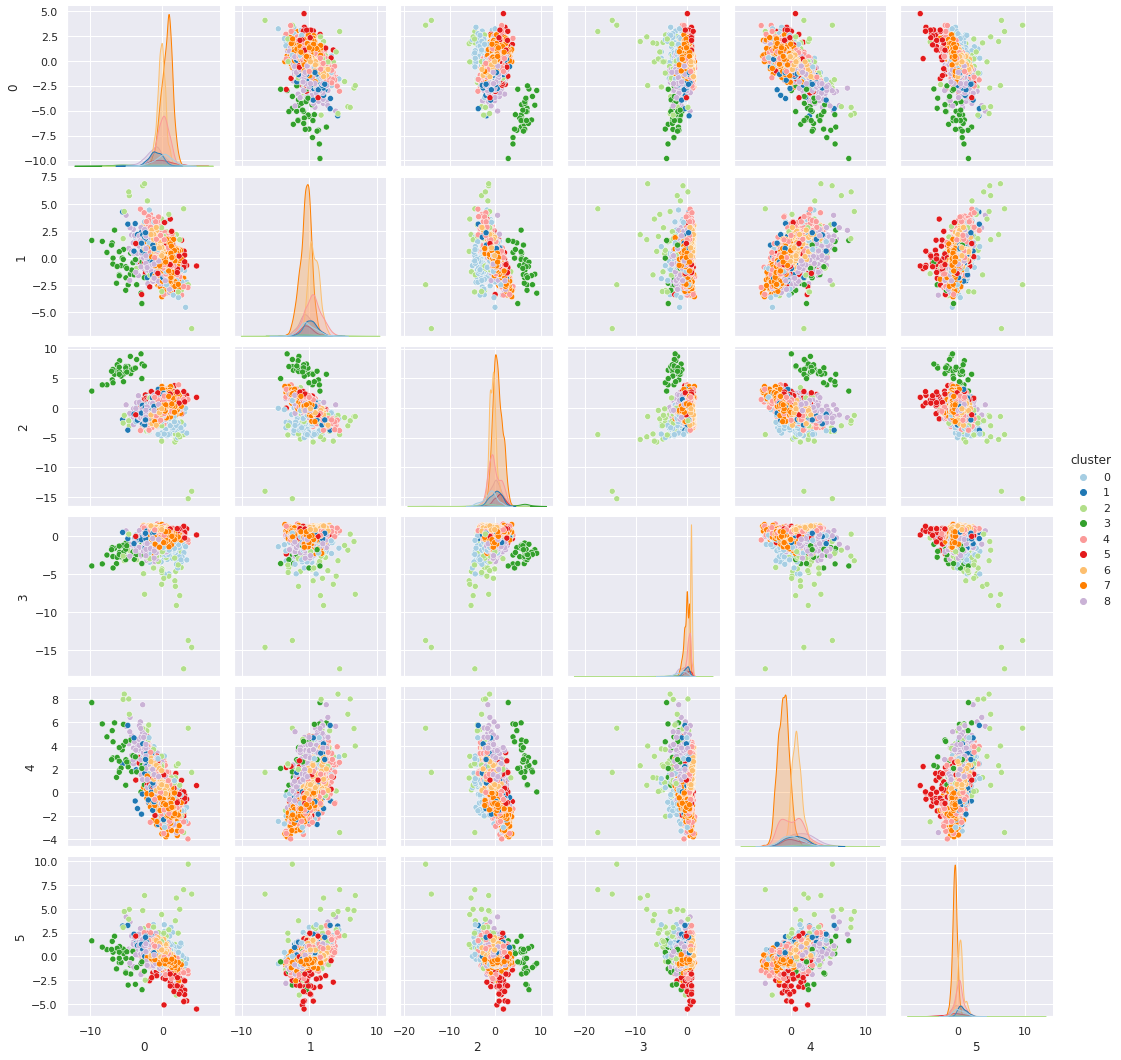

In [263]:
x_train_def_cluster = pd.DataFrame(x_train_pca.copy())
x_train_def_cluster['cluster'] =  prediction
x_train_def_cluster = x_train_def_cluster.sample(5000)
selectcol = [0, 1, 2, 3,4, 5, 'cluster']
# sns.pairplot()
sns.pairplot(x_train_def_cluster[selectcol], hue = 'cluster', palette=  'Paired')

In [ ]:
 model=GaussianMixture(n_components=6)
model.fit(x_train_pca)
prediction=model.predict(x_train_pca)

In [ ]:
#calculate MSE of each cluster and wieghted average them

def calcAvgRMSE(prediction, X_train_house, y_train_house, n):
  errorCalc = X_train_house.copy()
  errorCalc['cluster'] = prediction
  errorCalc['price'] = y_train_house

  cumul = 0
  for i in range(0,n):
    assign = errorCalc[errorCalc['cluster'] == i]
    meanCluster = np.mean(assign['price'])
    val = list((assign['price']))
    clusterSize = len(val)
    val = np.asarray(assign['price'])
    SSE = (sum((val - meanCluster)**2)/clusterSize)**(0.5)
    cumul = cumul + SSE * (clusterSize/errorCalc.shape[0])
  return cumul

In [ ]:
def setuptsne(prediction, X_train):
  perplexity = 50

  kclusters = pd.DataFrame(X_train.copy())
  kclusters['Cluster'] = prediction
  plotX = pd.DataFrame(np.array(kclusters.sample(5000)))
  plotX.columns = kclusters.columns

  tsne_2d = TSNE(n_components=2, perplexity=perplexity)
  TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
  TCs_2d.columns = ["TC1_2d","TC2_2d"]
  plotX = pd.concat([plotX,TCs_2d], axis=1, join='inner')
  return plotX

In [ ]:
  # kclusters = pd.DataFrame(x_train_pca.copy())
  # kclusters['Cluster'] = prediction
plotX = setuptsne(prediction, x_train_pca)

In [ ]:
rgblist = ['rgba(246, 189, 96, 0.8)',
           'rgba(152, 95, 153, 0.8)',
           'rgba(300, 31, 195, 0.8)',
           'rgba(132, 184, 77, 0.8)',
           'rgba(40, 56, 69, 0.8)',
           'rgba(132, 165, 157, 0.8)',
           'rgba(242, 22, 130, 0.8)',
           'rgba(311, 132, 186, 0.8)',
          'rgba(150, 280, 200, 0.8)',
          'rgba(30, 180, 153, 0.8)',
            'rgba(240, 30, 269, 0.8)',  
          'rgba(182, 20, 153, 0.8)',
                 'rgba(233, 60, 60, 0.8)'
]

In [ ]:
data = []
for i in range(0, 8):
  cCluster =  plotX[plotX["Cluster"] == i]
  print(cCluster.shape)
  trace1 = go.Scatter(
                      x = cCluster["TC1_2d"],
                      y = cCluster["TC2_2d"],
                      mode = "markers",
                      name = "Cluster " + str(i),
                      marker = dict(color = rgblist[i]),
                    text = None)

  data.append(trace1)


(37, 12)
(2283, 12)
(188, 12)
(1428, 12)
(163, 12)
(901, 12)
(0, 12)
(0, 12)


In [ ]:


title = "Visualizing GMM(Housing Data) SVD Using T-SNE (perplexity=" + str(50) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

## ICA

In [45]:
# https://github.com/akcarsten/Independent_Component_Analysis
from scipy.stats import norm, kurtosis

In [41]:
def center(x):
    mean = np.mean(x)
    centered =  x - mean
    return centered

In [42]:
# X_train_def.describe()

In [43]:
X_train_ICA = X_train_def.copy()
for col in X_train_ICA.columns:
  X_train_ICA[col] = center(np.asarray((X_train_ICA[col])))
X_train_ICA.shape

(22500, 33)

In [153]:
holder = []

for k in range(2, 30,2):
  transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=k)
  X_transformed = transformer.fit_transform(X_train_ICA)
  fishVal = np.mean(kurtosis(transformer.components_, fisher= True))
  holder.append(fishVal)
  print(k, fishVal)


2 -2.0
4 -0.8718477528249774
6 -0.1539228359150994
8 0.9008386918277307
10 1.6355973594207271
12 3.106538997564691
14 4.0043247550788434
16 5.476955370602228
18 7.794926296619647
20 7.744010365759132
22 8.99492950585182
24 9.2998830486265
26 13.782361892907586
28 14.795033731630989


Text(0.5, 1.0, 'ICA Components - Credit Card')

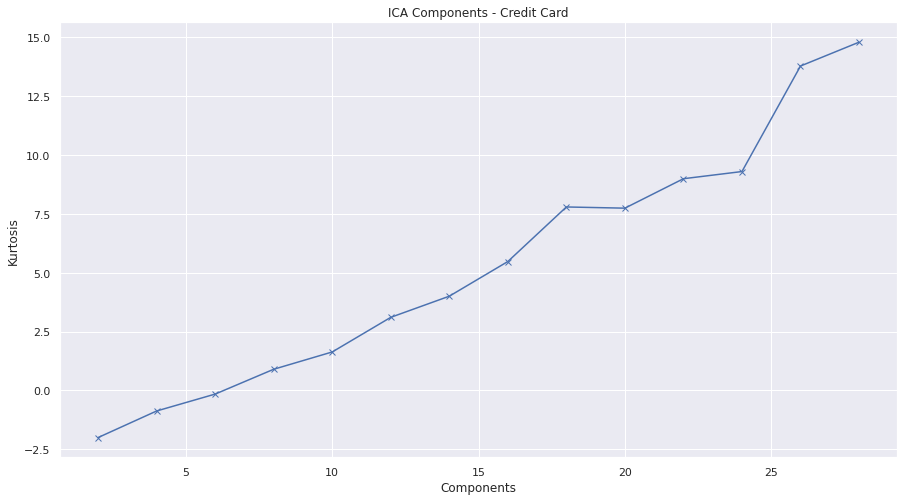

In [154]:
fishVal = kurtosis(transformer.components_, fisher= True)
# sorted(fishVal, reverse= True)

plt.figure(figsize=(15,8))
plt.plot( range(2, 30,2), holder, 'bx-')
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.title('ICA Components - Credit Card')


In [180]:
# X_train_ICA.describe()

In [46]:
transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=20)
X_transformed = transformer.fit_transform(X_train_ICA)
fishVal = kurtosis(transformer.components_, fisher= True)

input = list(range(0, len(fishVal)))
indTup = list(zip(fishVal, input))
sorted_by_second = sorted(indTup, key=lambda tup: tup[0], reverse= True)





[Text(0, 0, 'LIMIT_BAL'),
 Text(0, 0, 'AGE'),
 Text(0, 0, 'PAY_0'),
 Text(0, 0, 'PAY_2'),
 Text(0, 0, 'PAY_3'),
 Text(0, 0, 'PAY_4'),
 Text(0, 0, 'PAY_5'),
 Text(0, 0, 'PAY_6'),
 Text(0, 0, 'BILL_AMT1'),
 Text(0, 0, 'BILL_AMT2'),
 Text(0, 0, 'BILL_AMT3'),
 Text(0, 0, 'BILL_AMT4'),
 Text(0, 0, 'BILL_AMT5'),
 Text(0, 0, 'BILL_AMT6'),
 Text(0, 0, 'PAY_AMT1'),
 Text(0, 0, 'PAY_AMT2'),
 Text(0, 0, 'PAY_AMT3'),
 Text(0, 0, 'PAY_AMT4'),
 Text(0, 0, 'PAY_AMT5'),
 Text(0, 0, 'PAY_AMT6'),
 Text(0, 0, 'SEX_1'),
 Text(0, 0, 'SEX_2'),
 Text(0, 0, 'EDUCATION_0'),
 Text(0, 0, 'EDUCATION_1'),
 Text(0, 0, 'EDUCATION_2'),
 Text(0, 0, 'EDUCATION_3'),
 Text(0, 0, 'EDUCATION_4'),
 Text(0, 0, 'EDUCATION_5'),
 Text(0, 0, 'EDUCATION_6'),
 Text(0, 0, 'MARRIAGE_0'),
 Text(0, 0, 'MARRIAGE_1'),
 Text(0, 0, 'MARRIAGE_2'),
 Text(0, 0, 'MARRIAGE_3')]

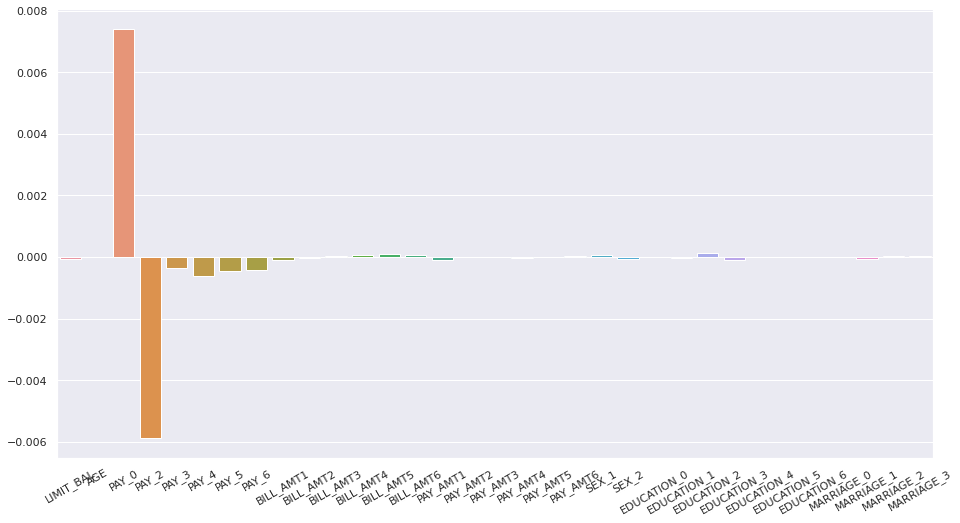

In [47]:
defaultComp = pd.DataFrame(data =transformer.components_  , columns = X_train_def.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_def.columns, y=transformer.components_[0])
ax.set_xticklabels(rotation=30, labels= X_train_def.columns)

#### ICA Clustering

### Housing ICA


In [ ]:
X_train_ICA = X_train_house.copy()
for col in X_train_ICA.columns:
  X_train_ICA[col] = center(np.asarray((X_train_ICA[col])))
X_train_ICA.shape

(5235, 15)

In [ ]:
holder = []

for k in range(2, 14,1):
  transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=k)
  X_transformed = transformer.fit_transform(X_train_ICA)
  fishVal = np.mean(kurtosis(transformer.components_, fisher= True))
  holder.append(fishVal)
  print(k, fishVal)

2 -2.0
3 -1.4999999999999998
4 -1.0154888642408475
5 -0.43834646270171634
6 -0.016609378336263317
7 0.2898667365652644
8 0.8146498457717908
9 1.638680721110223
10 2.0074509534632425
11 2.6086937141132682
12 2.276646350931942
13 2.5959246577688546


Text(0.5, 1.0, 'ICA Components - Housing Data')

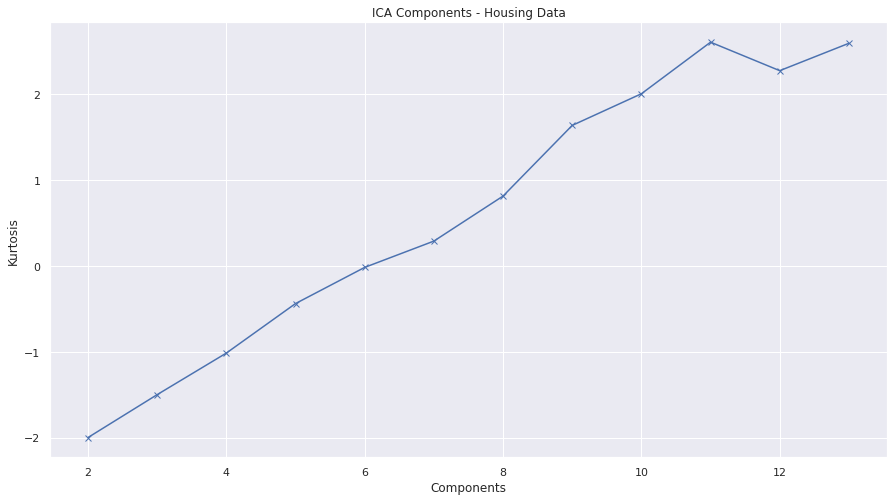

In [ ]:
fishVal = kurtosis(transformer.components_, fisher= True)
# sorted(fishVal, reverse= True)

plt.figure(figsize=(15,8))
plt.plot( range(2, 14,1), holder, 'bx-')
plt.xlabel('Components')
plt.ylabel('Kurtosis')
plt.title('ICA Components - Housing Data')

In [ ]:
transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=11)
X_transformed = transformer.fit_transform(X_train_ICA)
fishVal = kurtosis(transformer.components_, fisher= True)

input = list(range(0, len(fishVal)))
indTup = list(zip(fishVal, input))
sorted_by_second = sorted(indTup, key=lambda tup: tup[0], reverse= True)



[Text(0, 0, 'bedrooms'),
 Text(0, 0, 'bathrooms'),
 Text(0, 0, 'sqft_living'),
 Text(0, 0, 'sqft_lot'),
 Text(0, 0, 'floors'),
 Text(0, 0, 'waterfront'),
 Text(0, 0, 'view'),
 Text(0, 0, 'condition'),
 Text(0, 0, 'grade'),
 Text(0, 0, 'sqft_above'),
 Text(0, 0, 'sqft_basement'),
 Text(0, 0, 'yr_built'),
 Text(0, 0, 'yr_renovated'),
 Text(0, 0, 'sqft_living15'),
 Text(0, 0, 'sqft_lot15')]

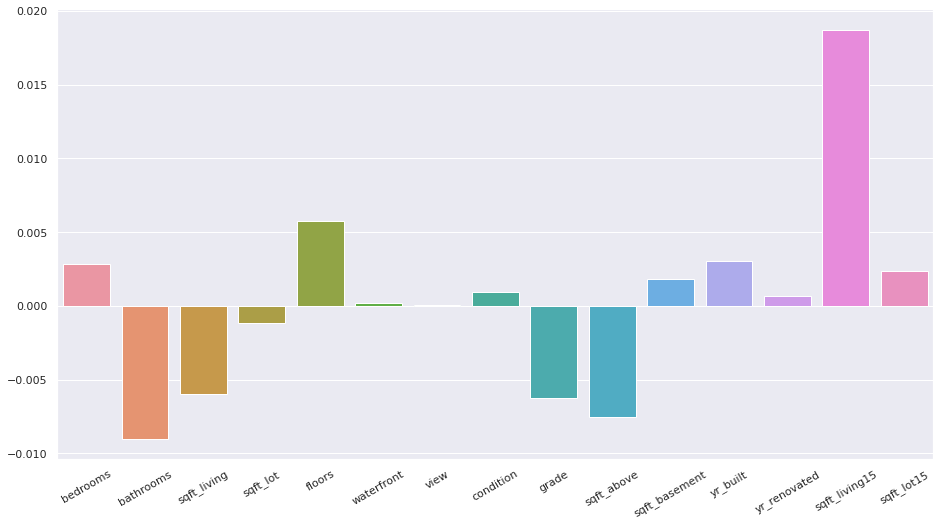

In [ ]:
defaultComp = pd.DataFrame(data =transformer.components_  , columns = X_train_house.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_house.columns, y=transformer.components_[1])
ax.set_xticklabels(rotation=30, labels= X_train_house.columns)

## Randomized 

In [ ]:
from sklearn.random_projection import SparseRandomProjection
transformer = GaussianRandomProjection(n_components = 33)
X_new = transformer.fit_transform(X_train_def)

In [ ]:
 abc = X_train_def.dot(transformer.components_.T)

In [ ]:
# abc.dot(np.linalg.pinv(transformer.components_.T))
# X_new

In [159]:
def tranfromCalc(n_comp, data):
  transformer = GaussianRandomProjection(n_components = n_comp)
  X_new = transformer.fit_transform(data)
  inver = X_new.dot(np.linalg.pinv(transformer.components_.T))
  differenceMatrix=data-inver
  return np.mean(np.square(np.linalg.norm(differenceMatrix, axis = 1)))
tranfromCalc(5, X_train_def)

21.69447474898986

In [160]:
X_train_house.shape

(5235, 15)

In [248]:
valRange = list(range(1,33,2))
holder = []
for i in range(0,5):
  for v in valRange:
    reconstructErr = tranfromCalc(v, X_train_def)
    holder.append((i,v, reconstructErr))


In [249]:
df = pd.DataFrame(holder, columns=['trial', 'component', 'error'])
df_avg = df.groupby(['component'])['error'].mean().reset_index()
df_avg['trial'] = 'avg'
df_avg = df_avg[['trial', 'component', 'error']]

df = df.append(df_avg, ignore_index= True)

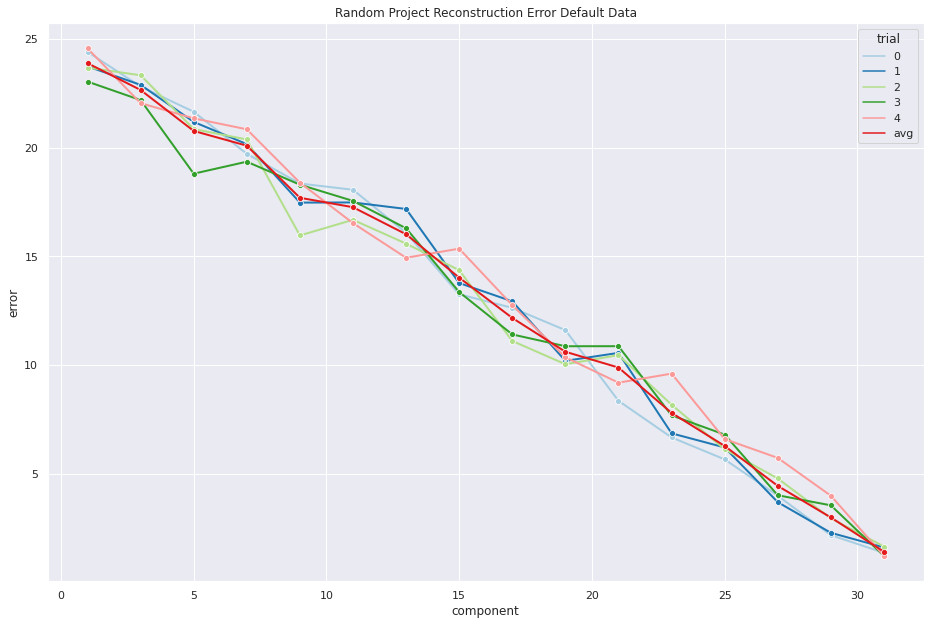

In [250]:
sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set_style("darkgrid")
sn.lineplot(data=df, x="component", y="error",  hue = "trial",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("Random Project Reconstruction Error Default Data")
plt.show()

In [251]:

df[df['component'] == 17]['error'].max() - df[df['component'] == 17]['error'].min()

np.std(df[df['component'] == 17]['error'])

0.688263255871432

### Housing


In [ ]:
X_test_house.shape

(1745, 15)

In [ ]:
valRange = list(range(1,15,1))
holder = []
for i in range(0,5):
  for v in valRange:
    reconstructErr = tranfromCalc(v, X_train_house)
    holder.append((i,v, reconstructErr))

In [ ]:
df = pd.DataFrame(holder, columns=['trial', 'component', 'error'])
df_avg = df.groupby(['component'])['error'].mean().reset_index()
df_avg['trial'] = 'avg'
df_avg = df_avg[['trial', 'component', 'error']]

df = df.append(df_avg, ignore_index= True)

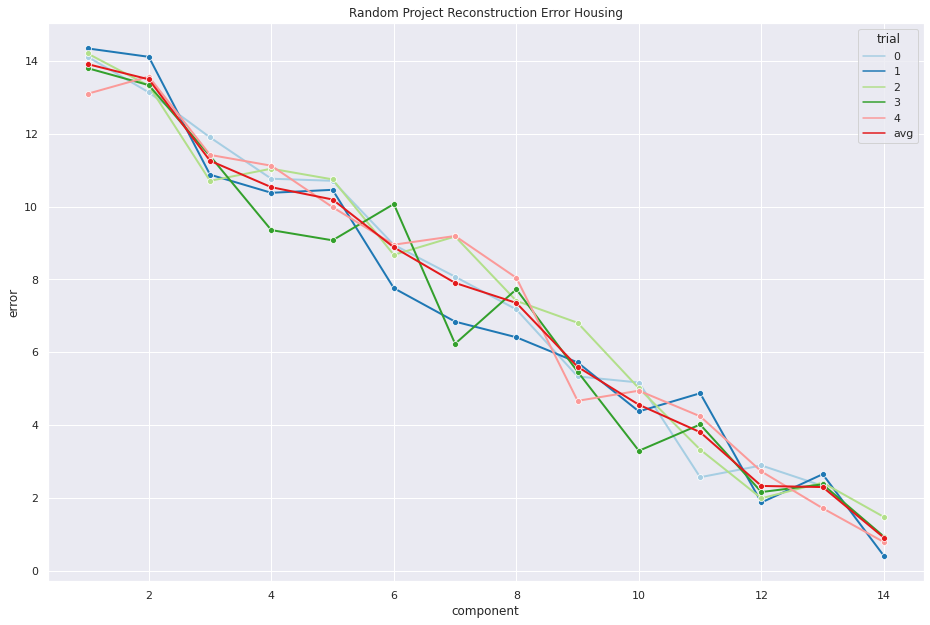

In [ ]:
sn.set(rc={'figure.figsize':(15.7,10.27)})
sn.set_style("darkgrid")
sn.lineplot(data=df, x="component", y="error",  hue = "trial",  marker="o", palette="Paired", markers = True, linewidth = 2)

plt.title("Random Project Reconstruction Error Housing")
plt.show()

In [ ]:
np.std(df[df['component'] == 12]['error'])

0.3706277993142977

## SVD


In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

components = range(0, len(X_train_def.columns),2)
val = []
for c in components:
  svd = TruncatedSVD(n_components=c, n_iter=7)
  svd.fit(X_train_def)
  val.append((c, svd.explained_variance_ratio_))

In [165]:
# svd.explained_variance_ratio_

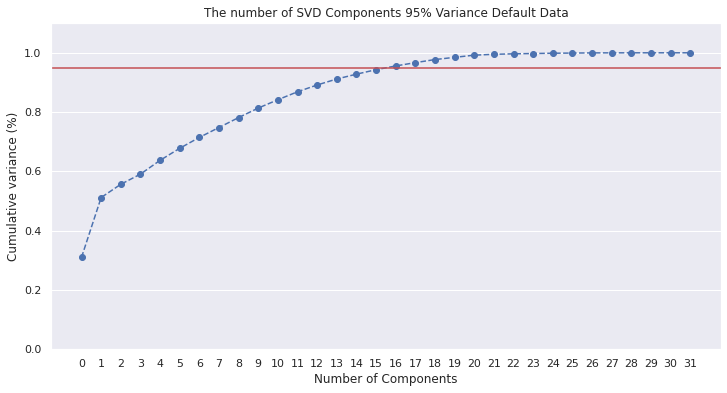

In [166]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, len(X_train_def.columns)-1, step=1)
y = np.cumsum(svd.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X_train_def.columns)-1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of SVD Components 95% Variance Default Data')

plt.axhline(y=0.95, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=7, n_iter=7)
svd.fit(X_train_def)

TruncatedSVD(algorithm='randomized', n_components=7, n_iter=7,
             random_state=None, tol=0.0)

In [ ]:
svd.explained_variance_ratio_

array([0.78967208, 0.06829367, 0.04410904, 0.01421723, 0.00901271,
       0.00839496, 0.00804985])

[Text(0, 0, 'LIMIT_BAL'),
 Text(0, 0, 'AGE'),
 Text(0, 0, 'PAY_0'),
 Text(0, 0, 'PAY_2'),
 Text(0, 0, 'PAY_3'),
 Text(0, 0, 'PAY_4'),
 Text(0, 0, 'PAY_5'),
 Text(0, 0, 'PAY_6'),
 Text(0, 0, 'BILL_AMT1'),
 Text(0, 0, 'BILL_AMT2'),
 Text(0, 0, 'BILL_AMT3'),
 Text(0, 0, 'BILL_AMT4'),
 Text(0, 0, 'BILL_AMT5'),
 Text(0, 0, 'BILL_AMT6'),
 Text(0, 0, 'PAY_AMT1'),
 Text(0, 0, 'PAY_AMT2'),
 Text(0, 0, 'PAY_AMT3'),
 Text(0, 0, 'PAY_AMT4'),
 Text(0, 0, 'PAY_AMT5'),
 Text(0, 0, 'PAY_AMT6'),
 Text(0, 0, 'SEX_1'),
 Text(0, 0, 'SEX_2'),
 Text(0, 0, 'EDUCATION_0'),
 Text(0, 0, 'EDUCATION_1'),
 Text(0, 0, 'EDUCATION_2'),
 Text(0, 0, 'EDUCATION_3'),
 Text(0, 0, 'EDUCATION_4'),
 Text(0, 0, 'EDUCATION_5'),
 Text(0, 0, 'EDUCATION_6'),
 Text(0, 0, 'MARRIAGE_0'),
 Text(0, 0, 'MARRIAGE_1'),
 Text(0, 0, 'MARRIAGE_2'),
 Text(0, 0, 'MARRIAGE_3')]

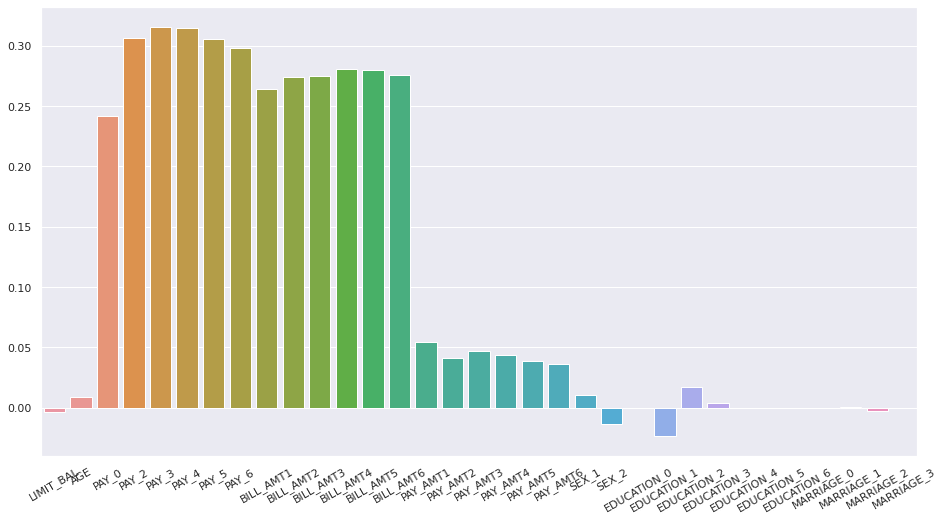

In [ ]:
defaultComp = pd.DataFrame(data = svd.components_ , columns = X_train_def.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_def.columns, y=svd.components_[1])
ax.set_xticklabels(rotation=30, labels= X_train_def.columns)

### SVD housing data

In [ ]:
svd = TruncatedSVD(n_components=14, n_iter=7)
svd.fit(X_train_house)

TruncatedSVD(algorithm='randomized', n_components=14, n_iter=7,
             random_state=None, tol=0.0)

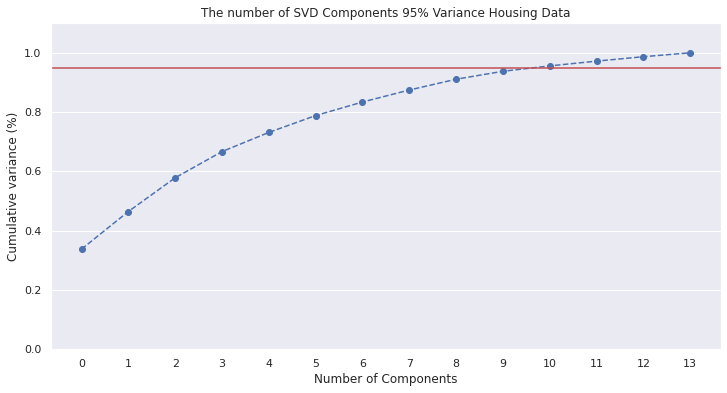

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, len(X_train_house.columns)-1, step=1)
y = np.cumsum(svd.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(X_train_house.columns)-1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of SVD Components 95% Variance Housing Data')

plt.axhline(y=0.95, color='r', linestyle='-')
ax.grid(axis='x')
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=9, n_iter=7)
svd.fit(X_train_house)

TruncatedSVD(algorithm='randomized', n_components=9, n_iter=7,
             random_state=None, tol=0.0)

[Text(0, 0, 'bedrooms'),
 Text(0, 0, 'bathrooms'),
 Text(0, 0, 'sqft_living'),
 Text(0, 0, 'sqft_lot'),
 Text(0, 0, 'floors'),
 Text(0, 0, 'waterfront'),
 Text(0, 0, 'view'),
 Text(0, 0, 'condition'),
 Text(0, 0, 'grade'),
 Text(0, 0, 'sqft_above'),
 Text(0, 0, 'sqft_basement'),
 Text(0, 0, 'yr_built'),
 Text(0, 0, 'yr_renovated'),
 Text(0, 0, 'sqft_living15'),
 Text(0, 0, 'sqft_lot15')]

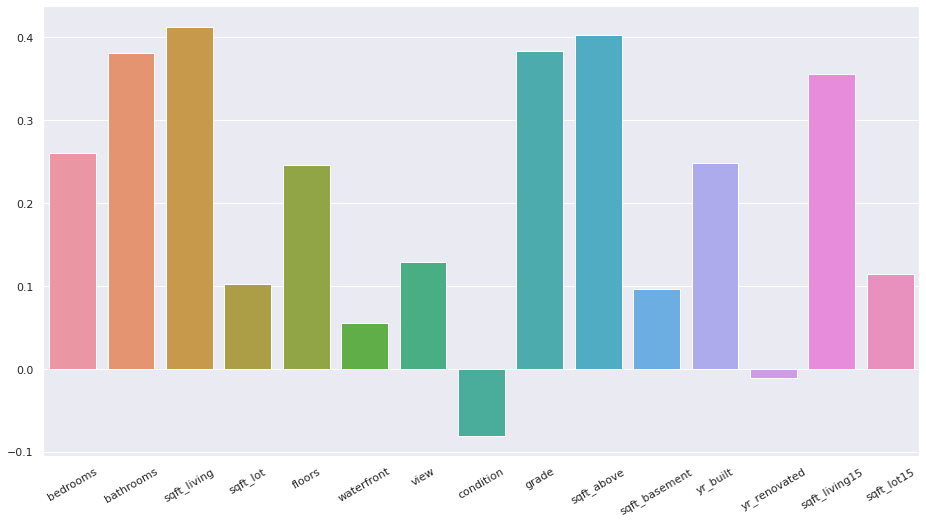

In [ ]:
defaultComp = pd.DataFrame(data = svd.components_ , columns = X_train_house.columns)
sns.set(rc={'figure.figsize':(15.7,8.27)})

ax = sns.barplot(x=X_train_house.columns, y=svd.components_[0])
ax.set_xticklabels(rotation=30, labels= X_train_house.columns)

#Neural Netwrok DR

In [275]:
#tweak learning rate
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.009539621664406897)
  model =  Sequential()
  model.add(Dense(300, input_dim=15, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [276]:
X_train_house.shape

(5235, 15)

In [292]:
def learningCurveDT(X,Y, create_model):
  testPercent = np.arange(0.05, 1.0, 0.1)
  testPercent = np.concatenate(( np.asarray([0.02]), testPercent, np.asarray([0.99])))
  # testPercent = [0.85]
  auclist = []
  for test_range in testPercent:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                  test_size=test_range, random_state = 150, shuffle = True)
    model = create_model()
    model.fit(X_train, Y_train, epochs=80, batch_size=64,  verbose=0)
    print(test_range)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val = mean_squared_error(Y_test, y_pred)
    train_auc = mean_squared_error(Y_train, y_train_pred)
    # f1_val, train_auc = get_acc_NN_randomisedCV(X,Y, create_model,test_range)
    auclist.append((f1_val,train_auc))
    # auc = get_acc_NN_randomisedCV(X,Y,model, test_range)
    # auclist.append(auc)
    print((train_auc,f1_val))
  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
    'F1_test':pd.Series(list(zip(*auclist))[0]),
  'test_split':pd.Series(testPercent)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE on Housing Dataset")
  plt.plot('test_split','F1_train', data=d, label='F1_train')
  plt.plot('test_split','F1_test', data=d, label='F1_test')
  plt.xlabel('test_split')
  plt.xlim([1.0,0.0])
  plt.ylabel('MSE')
  plt.legend()
# learningCurveDT(X_train_house, y_train_house, finalmodel)

In [ ]:
#RPSVD Score final model
start = time.time()
model = finalmodel()
model.fit(X_train_house, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(X_test_house)
y_train_pred = model.predict(X_train_house)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

15.9727942943573 time
46200448382.016106 test
34980564100.332695 train


### PCA NN

In [49]:
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(X_train_house)
x_train_pca.shape

x_test_pca = pca.transform(X_test_house)
x_test_pca.shape

(1745, 11)

In [284]:
def neuronsLayer(value, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  model =  Sequential()
  model.add(Dense(value, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(value*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  
  return model 

In [282]:
def neuronGraph(neuronsLayer, X, Y, comp):
  neurons = [10, 30, 60, 80, 90, 100, 120, 140, 160, 180, 190, 200, 250, 300, 400]
  auclist = []
  X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                              test_size=0.4,  shuffle = True)
  for neu in neurons:
    model = neuronsLayer(neu, comp)
    model.fit(X_train, y_train, epochs=80, batch_size=64,  verbose=0)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val_ne = mean_squared_error(y_test, y_pred)
    train_auc_val = mean_squared_error(y_train, y_train_pred)

    auclist.append((f1_val_ne,train_auc_val))
    print((f1_val_ne,train_auc_val, neu))

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
  'F1_test':pd.Series(list(zip(*auclist))[0]),
  'nerons':pd.Series(neurons)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE on #of Neurons")
  plt.plot('nerons','F1_train', data=d, label='F1_train')
  plt.plot('nerons','F1_test', data=d, label='F1_test')
  plt.xlabel('nerons')
  plt.ylabel('MSE')
  # plt.ylim([0.6,1.1])
  plt.legend()

# neuronGraph(neuronsLayer, x_train_pca, y_train_house, comp)

In [ ]:
import math

# math.log(10)
learning = 10e-05
learningLst = []
learningLst.append(learning)
for i in range (0,25):
  learning  = 2 * learning
  learningLst.append(learning)


In [288]:
def learningRate(learning, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=learning)
  model =  Sequential()
  model.add(Dense(150, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(150*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [289]:

def findLearning(learningLst, learningRate, X, Y, input ):
  auclist = []
  X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                              test_size=0.1,  random_state=150, shuffle = True)
  for learn in learningLst:
    model = learningRate(learn, input)
    model.fit(X_train, y_train, epochs=80, batch_size=64,  verbose=0)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val_ne = mean_squared_error(y_test, y_pred)
    train_auc_val = mean_squared_error(y_train, y_train_pred)
    auclist.append((f1_val_ne,train_auc_val))
    print((f1_val_ne,train_auc_val, learn))

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
  'F1_test':pd.Series(list(zip(*auclist))[0]),
  'learningRate':pd.Series(learningLst)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE Learning Rate DNN")
  plt.plot('learningRate','F1_train', data=d, label='F1_train')
  plt.plot('learningRate','F1_test', data=d, label='F1_test')
  plt.xlabel('learningRate')
  plt.ylabel('MSE')
  plt.xscale('log', basex=2)
  # plt.xlim([10e-05, 1.1])
  # plt.ylim([0.6,1.1])
  plt.legend()
  return d

# d = findLearning(learningLst, learningRate, x_train_pca, y_train_house, 9 )

In [ ]:
#tweak learning rate
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.33252567300796504)
  model =  Sequential()
  model.add(Dense(150, input_dim=11, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(150*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [ ]:
y_train_house.shape

(5235,)

In [ ]:
#PCA Score final model
start = time.time()
model = finalmodel()
model.fit(x_train_pca, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(x_test_pca)
y_train_pred = model.predict(x_train_pca)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

10.961098670959473 time


In [ ]:
print(f1_val_ne, "test")
print(train_auc_val, 'train')

45092988555.76112 test
28679516225.97524 train


##ICA NN

In [34]:
transformer = FastICA(whiten=True, random_state=1, max_iter=10000,tol= 1e-3, n_components=11)
x_train_pca = transformer.fit_transform(X_train_house)

(399102027716.0821, 416661359486.1613, 10)
(303089496605.3278, 318944027578.3039, 30)
(187106185933.21634, 200163319542.71045, 60)
(130183074463.28227, 140905496284.84695, 80)
(114826510086.79909, 124153173550.83974, 90)
(112332110755.51636, 121158510777.19167, 100)
(110920537083.56755, 119317459317.34206, 120)
(110086181397.6002, 118403400573.33965, 140)
(109347871473.50343, 117644677685.31229, 160)
(108488711587.59421, 116682126729.64091, 180)
(107347870881.75209, 115476073115.8156, 190)
(106836264353.87279, 114906446588.3653, 200)
(105906608018.80145, 114025933720.67586, 250)
(103244263456.31519, 111119605769.44795, 300)
(98565187266.91524, 106157267893.66296, 400)
sds


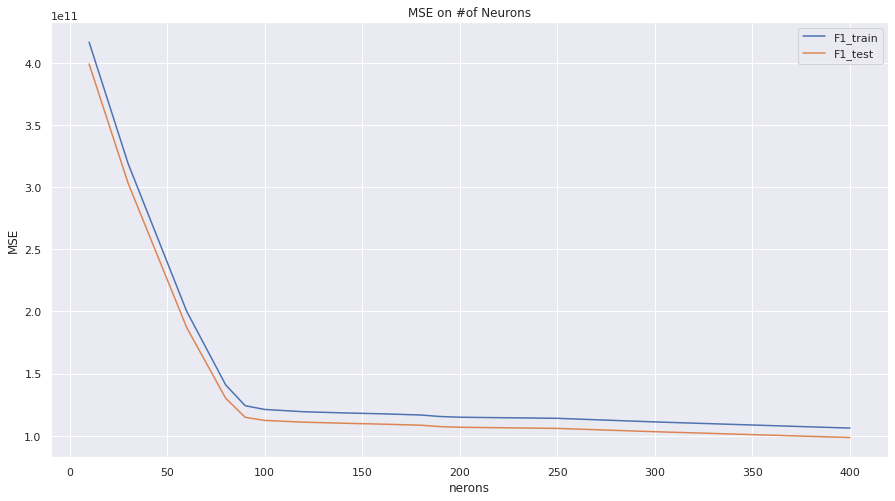

In [285]:
neuronGraph(neuronsLayer, x_train_pca, y_train_house, 11)

In [286]:
learning = 10e-05
learningLst = []
learningLst.append(learning)
for i in range (0,25):
  learning  = 1.5 * learning
  learningLst.append(learning)

(495344891930.47534, 402559732225.0943, 0.0001)
(477281731020.55597, 385555053774.95233, 0.00015000000000000001)
(434146922906.49506, 345078084668.99054, 0.00022500000000000002)
(324397594159.4876, 243269267075.40332, 0.0003375)
(176566834867.6939, 115351546329.11581, 0.00050625)
(163450159898.58606, 107651039103.91139, 0.000759375)
(155705894525.21368, 102325253821.15009, 0.0011390624999999999)
(139862026328.4382, 91312930152.55421, 0.0017085937499999998)
(90176164116.15753, 58321296176.816986, 0.0025628906249999996)
(64209560240.05114, 45419398967.43409, 0.0038443359374999994)
(59740515312.74624, 43821524725.38459, 0.00576650390625)
(56560580232.08625, 42569887067.994896, 0.008649755859375)
(55305095704.784515, 41774109418.86005, 0.0129746337890625)
(53801240426.67034, 41024570450.38102, 0.01946195068359375)
(53105961042.22242, 40811089085.25903, 0.029192926025390625)
(52432537033.21832, 39072149466.07276, 0.043789389038085935)
(52209707472.25512, 37264839332.55782, 0.065684083557128

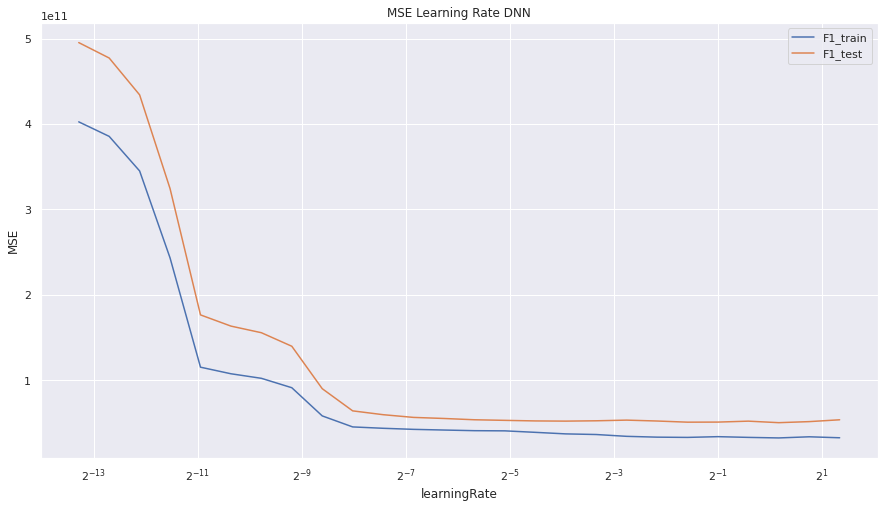

In [290]:
d = findLearning(learningLst, learningRate, x_train_pca, y_train_house, 11 )

In [ ]:
0.1024

In [36]:
#tweak learning rate
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.01946195068359375)
  model =  Sequential()
  model.add(Dense(300, input_dim=11, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [37]:
def learningCurveDT(X,Y, create_model):
  testPercent = np.arange(0.05, 1.0, 0.1)
  testPercent = np.concatenate(( np.asarray([0.02]), testPercent, np.asarray([0.99])))
  # testPercent = [0.85]
  auclist = []
  for test_range in testPercent:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, \
                                                  test_size=test_range, random_state = 150, shuffle = True)
    model = create_model()
    model.fit(X_train, Y_train, epochs=80, batch_size=64,  verbose=0)
    print(test_range)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val = mean_squared_error(Y_test, y_pred)
    train_auc = mean_squared_error(Y_train, y_train_pred)
    # f1_val, train_auc = get_acc_NN_randomisedCV(X,Y, create_model,test_range)
    auclist.append((f1_val,train_auc))
    # auc = get_acc_NN_randomisedCV(X,Y,model, test_range)
    # auclist.append(auc)
    print((train_auc,f1_val))
  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
    'F1_test':pd.Series(list(zip(*auclist))[0]),
  'test_split':pd.Series(testPercent)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE on Housing Dataset")
  plt.plot('test_split','F1_train', data=d, label='F1_train')
  plt.plot('test_split','F1_test', data=d, label='F1_test')
  plt.xlabel('test_split')
  plt.xlim([1.0,0.0])
  plt.ylabel('MSE')
  plt.legend()

0.02
(40086467822.90158, 82083120975.22136)
0.05
(40544233028.44274, 58617316264.27633)
0.15000000000000002
(39374769180.582146, 53928647030.39459)
0.25000000000000006
(39409275862.47062, 49845786491.41065)
0.35000000000000003
(40209010197.14172, 45349114208.07812)
0.45000000000000007
(43338009259.27466, 44315606066.93179)
0.5500000000000002
(42128526267.2507, 43862348462.26837)
0.6500000000000001
(39024424982.45522, 47965827504.30321)
0.7500000000000002
(40541251228.937904, 46737505805.794815)
0.8500000000000002
(41780040829.512764, 50292452625.691345)
0.9500000000000002
(75194462001.76187, 107385015894.4404)
0.99
(231962690506.09372, 261846297449.87885)
sds


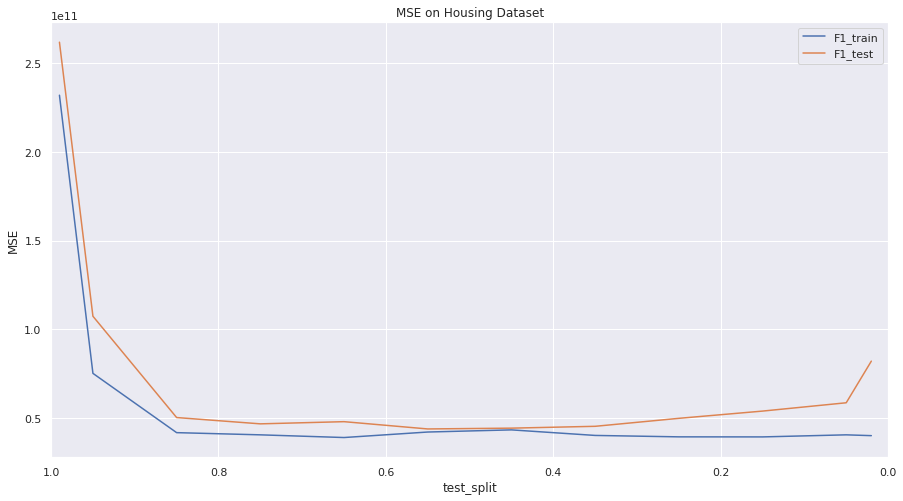

In [38]:
learningCurveDT(x_train_pca, y_train_house, finalmodel)

In [ ]:
#PCA Score final model
start = time.time()
model = finalmodel()
model.fit(x_train_pca, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(x_test_pca)
y_train_pred = model.predict(x_train_pca)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

10.49821400642395 time
43708599943.9914 test
32792832965.356735 train


## RP NN


In [ ]:
transformer = GaussianRandomProjection(n_components = 8)
x_train_pca = transformer.fit_transform(X_train_house)
x_test_pca = transformer.transform(X_test_house)

(394791009312.0476, 343632205933.33496, 10)
(223408357263.78, 187315502554.52042, 30)
(118373743014.45485, 102973552509.52937, 60)
(111497710026.95953, 96738868031.90779, 80)
(108793389548.69093, 93988325245.15244, 90)
(106745438628.48698, 92199299698.21689, 100)
(99013651096.32822, 84617030928.46027, 120)
(94612010625.40099, 80260011843.0435, 140)
(87338017783.11703, 72785181626.64615, 160)
(83711035641.1722, 69333219031.47806, 180)
(84299828184.20695, 69677532505.06714, 190)
(78402917465.22949, 63147567902.82684, 200)
(72633936194.873, 56462322959.6092, 250)
(69846133716.82507, 52361479106.00017, 300)
(66977077369.365456, 47474051496.73527, 400)
sds


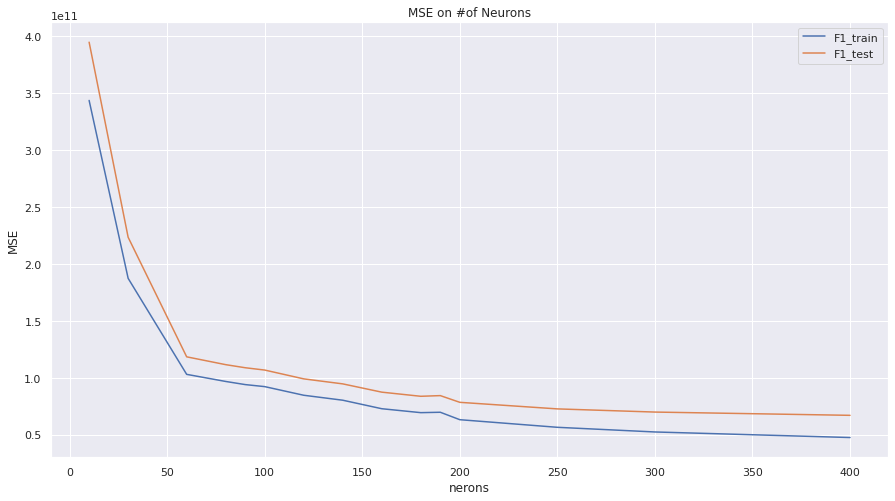

In [ ]:
neuronGraph(neuronsLayer, x_train_pca, y_train_house, 8)

In [ ]:
def learningRate(learning, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=learning)
  model =  Sequential()
  model.add(Dense(300, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

d = findLearning(learningLst, learningRate, x_train_pca, y_train_house, 8 )

(407256079589.06934, 323057743317.7384, 0.0001)
(164142435206.79486, 116457420534.8533, 0.0002)
(114696209385.84503, 80560352668.10786, 0.0004)
(79750765255.92711, 53595001535.537025, 0.0008)
(71888136804.5006, 47085059650.574974, 0.0016)
(70158361886.4704, 44189425830.17848, 0.0032)
(63960523982.134155, 41385360935.56555, 0.0064)
(61652145751.67107, 39503161355.19542, 0.0128)
(62357307988.5234, 38514876061.96268, 0.0256)
(58078364841.84986, 37331440133.302414, 0.0512)
(64118741905.16728, 37438048038.86402, 0.1024)
(54798338852.874275, 33084248664.77501, 0.2048)
(63586347653.26119, 34836610785.46593, 0.4096)
(64190247115.70855, 35282790971.4585, 0.8192)
(61043829931.56667, 36745472744.34268, 1.6384)
(481506407793.7901, 389434215811.8937, 3.2768)
(465229766781.517, 374057253619.46686, 6.5536)
(461665384935.14343, 370693289782.72845, 13.1072)
(489354598180.6076, 396857287367.4969, 26.2144)
(500019361877.54254, 406952915153.379, 52.4288)
(502677990446.68835, 409471146269.1197, 104.8576)


ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.2048)
  model =  Sequential()
  model.add(Dense(150, input_dim=8, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(150*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [ ]:
#RP Score final model
start = time.time()
model = finalmodel()
model.fit(x_train_pca, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(x_test_pca)
y_train_pred = model.predict(x_train_pca)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

10.223657131195068 time
65964799972.94862 test
50045484215.79622 train


## SVD NN

In [ ]:
svd = TruncatedSVD(n_components=9, n_iter=7)
x_train_pca = svd.fit_transform(X_train_house)
x_test_pca = svd.transform(X_test_house)

(381419123526.06635, 389237627510.3429, 10)
(243451028324.92847, 244691580907.59003, 30)
(94868508262.66663, 91643984591.52452, 60)
(79114590148.89726, 77407252247.6134, 80)
(60888247875.53683, 59754539458.20047, 90)
(59077352175.21468, 57879046211.30243, 100)
(52050713894.03425, 51549211655.405685, 120)
(51923955983.69001, 51327352343.88919, 140)
(49420157788.71157, 48860842169.549385, 160)
(48200442588.03571, 48020840224.49389, 180)
(48112035091.7185, 47643401093.41181, 190)
(48458258521.387955, 48037671292.10167, 200)
(46784241727.09536, 46611254079.67815, 250)
(46597602741.37877, 46386638928.47598, 300)
(45824782270.26388, 45649402368.331345, 400)
sds


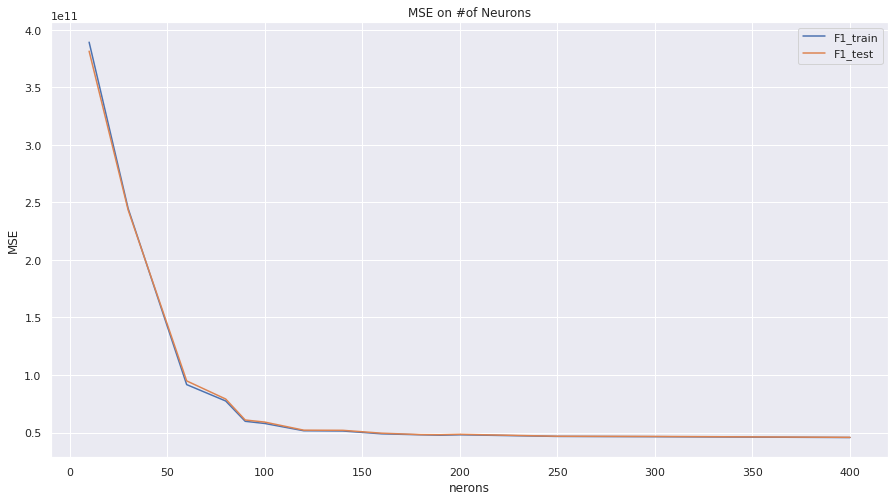

In [ ]:
neuronGraph(neuronsLayer, x_train_pca, y_train_house, 9)

In [ ]:
learning = 10e-05
learningLst = []
learningLst.append(learning)
for i in range (0,25):
  learning  = 2 * learning
  learningLst.append(learning)

In [ ]:
def learningRate(learning, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=learning)
  model =  Sequential()
  model.add(Dense(150, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(150*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

d = findLearning(learningLst, learningRate, x_train_pca, y_train_house, 9 )

(486785630800.4112, 396102011037.2831, 0.0001)
(368172304438.2038, 298329902170.20984, 0.0002)
(80134470026.12473, 65629271364.52404, 0.0004)
(62781355435.09678, 45997399527.3346, 0.0008)
(59339288025.51718, 43300452114.92068, 0.0016)
(57810682122.519875, 42194157157.6786, 0.0032)
(56679092232.23725, 40635599886.63353, 0.0064)
(52635114904.607376, 38372997653.60855, 0.0128)
(54018310057.782646, 36253304344.926346, 0.0256)
(49326561637.75027, 35152369585.45444, 0.0512)
(51852556022.49061, 34177049536.338642, 0.1024)
(52070331132.63071, 34035277033.52047, 0.2048)
(48881666301.035904, 31541184224.233814, 0.4096)
(51428195957.470314, 33481037579.33618, 0.8192)
(50462956683.89103, 34337653319.593914, 1.6384)
(481412541733.12463, 389345467535.30786, 3.2768)
(461093318125.7096, 370153506971.24774, 6.5536)
(432345588780.81323, 343072716286.61005, 13.1072)
(440947118293.0505, 351165959702.00574, 26.2144)
(478084610812.599, 386199500477.8579, 52.4288)
(497955584697.2774, 404998524877.7306, 104.8

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.4096)
  model =  Sequential()
  model.add(Dense(150, input_dim=9, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(150*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [ ]:
#RPSVD Score final model
start = time.time()
model = finalmodel()
model.fit(x_train_pca, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(x_test_pca)
y_train_pred = model.predict(x_train_pca)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

9.657696962356567 time
45307094745.90213 test
34438605937.27776 train


# NN Clustering

## NN Kmeans 

In [51]:
  model=GaussianMixture(n_components=8)
  model.fit(X_train_house)
  prediction=model.predict(X_train_house)

  x_train_cluster = X_train_house.copy()
  x_test_cluster = X_test_house.copy()
  x_train_cluster['cluster'] = prediction
  
  y_cluster = model.predict(X_test_house)
  x_test_cluster['cluster'] = y_cluster

In [52]:
x_train_cluster.shape

(5235, 16)

(364870534706.0223, 366720849992.72034, 10)
(153462726308.08328, 151757650944.1885, 30)
(74196258896.02026, 72920143206.89412, 60)
(62137255296.7837, 59936456258.959335, 80)
(62429923945.62088, 60435286576.884315, 90)
(59449438473.389626, 56651355546.39919, 100)
(58222626390.44901, 55329824762.6478, 120)
(57031444962.95971, 53944398243.484695, 140)
(55633390467.02253, 52525350724.88324, 160)
(54882626970.38025, 51659470059.98208, 180)
(54966951097.72192, 51893792329.25961, 190)
(53967650458.044205, 50904140295.038864, 200)
(52197418633.20465, 49278891690.9878, 250)
(51242563645.974304, 48329908358.22052, 300)
(49694164812.7173, 46785615793.291595, 400)
sds


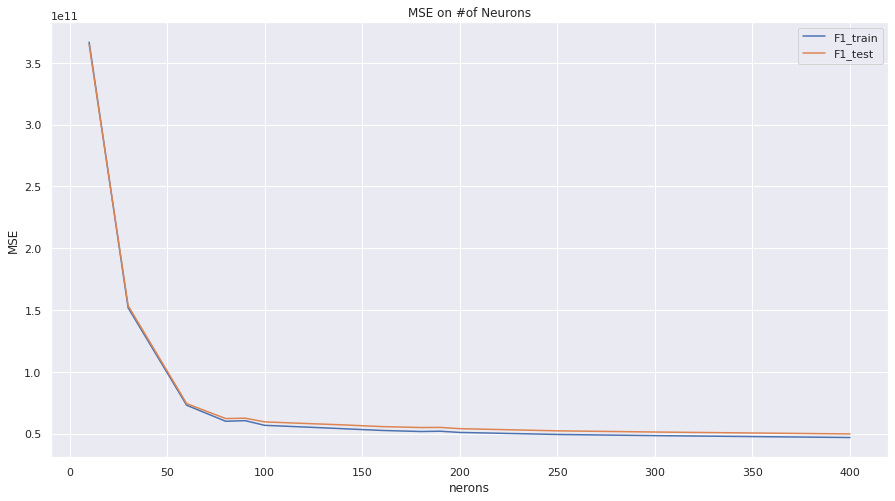

In [ ]:
neuronGraph(neuronsLayer, x_train_cluster, y_train_house, 16)

In [ ]:
def learningRate(learning, input):

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=learning)
  model =  Sequential()
  model.add(Dense(300, input_dim=input, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

In [ ]:
import math

# math.log(10)
learning = 10e-05
learningLst = []
learningLst.append(learning)
for i in range (0,25):
  learning  = 1.5 * learning
  learningLst.append(learning)

(337848608515.79553, 266942297174.0226, 0.0001)
(151365889446.6164, 112725535133.63222, 0.00015000000000000001)
(90542405875.75821, 67224737223.114426, 0.00022500000000000002)
(75643074772.28824, 56136276321.572685, 0.0003375)
(68425979287.99165, 50936481393.77213, 0.00050625)
(61939365755.74408, 46244895404.22084, 0.000759375)
(55964908169.77154, 42114281073.15952, 0.0011390624999999999)
(52644083832.58679, 39672714574.286766, 0.0017085937499999998)
(50325652923.51257, 37937498851.146904, 0.0025628906249999996)
(48866475628.04511, 36332082517.090385, 0.0038443359374999994)
(47941765645.2235, 35062731593.770386, 0.00576650390625)
(46627165654.967926, 34013537024.085125, 0.008649755859375)
(47650322824.53944, 33761936900.551636, 0.0129746337890625)
(45006067795.72928, 32821348502.390408, 0.01946195068359375)
(46413719210.49427, 32253379005.370907, 0.029192926025390625)
(48612462431.78808, 29871892457.1428, 0.043789389038085935)
(45729127354.897575, 28204026976.70045, 0.0656840835571289)

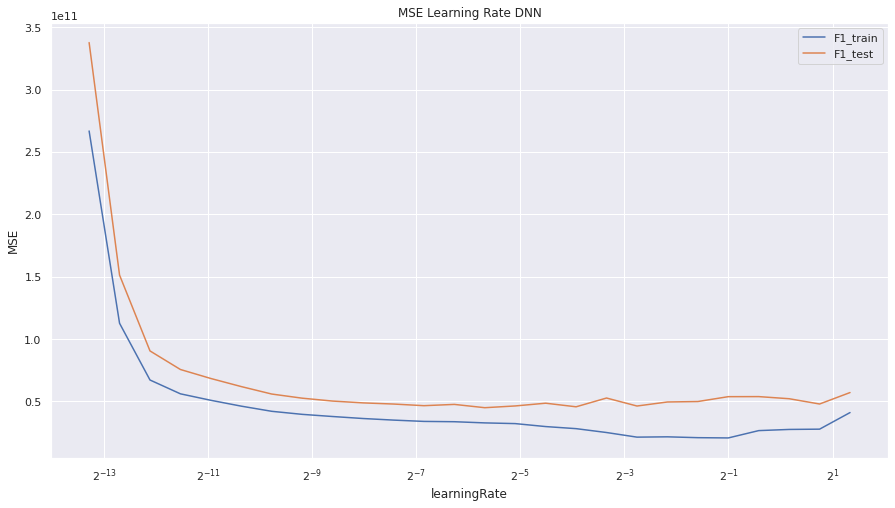

In [ ]:

def findLearning(learningLst, learningRate, X, Y, input ):
  auclist = []
  X_train, X_test, y_train, y_test = train_test_split(X, Y, \
                                              test_size=0.1,  random_state=150, shuffle = True)
  for learn in learningLst:
    model = learningRate(learn, input)
    model.fit(X_train, y_train, epochs=80, batch_size=64,  verbose=0)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    f1_val_ne = mean_squared_error(y_test, y_pred)
    train_auc_val = mean_squared_error(y_train, y_train_pred)
    auclist.append((f1_val_ne,train_auc_val))
    print((f1_val_ne,train_auc_val, learn))

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*auclist))[1]),
  'F1_test':pd.Series(list(zip(*auclist))[0]),
  'learningRate':pd.Series(learningLst)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("MSE Learning Rate DNN")
  plt.plot('learningRate','F1_train', data=d, label='F1_train')
  plt.plot('learningRate','F1_test', data=d, label='F1_test')
  plt.xlabel('learningRate')
  plt.ylabel('MSE')
  plt.xscale('log', basex=2)
  # plt.xlim([10e-05, 1.1])
  # plt.ylim([0.6,1.1])
  plt.legend()
  return d

d = findLearning(learningLst, learningRate, x_train_cluster, y_train_house, 16 )

In [57]:
from sklearn.metrics import mean_squared_error
def finalmodel():

  # epochs=50
  # learning_rate = learning
  # decay_rate = learning_rate / epochs
  # momentum = 0.8

  # sgd = SGD(lr=learning_rate,  decay=decay_rate, momentum = momentum nesterov=False)
  opt = keras.optimizers.Adam(learning_rate=0.0025628906249999996)
  model =  Sequential()
  model.add(Dense(300, input_dim=16, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(round(300*2/3), activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=opt)
  
  return model 

0.02
(37565110306.9777, 78716163938.06677)
0.05
(37496808254.67312, 54601374228.21677)
0.15000000000000002
(36666855282.54248, 49196359647.61063)
0.25000000000000006
(36516055995.80836, 46779397600.46951)
0.35000000000000003
(38305954549.59079, 44814768621.00058)
0.45000000000000007
(39963517904.773796, 44033874694.20866)
0.5500000000000002
(40849201818.54178, 45422614945.90966)
0.6500000000000001
(39482705625.56214, 49549861573.3535)
0.7500000000000002
(42626665948.7751, 51310860159.36425)
0.8500000000000002
(46847104601.95661, 55673945428.71784)
0.9500000000000002
(58980214483.9614, 90707852266.80302)
0.99
(380117472080.1221, 413409629722.24475)
sds


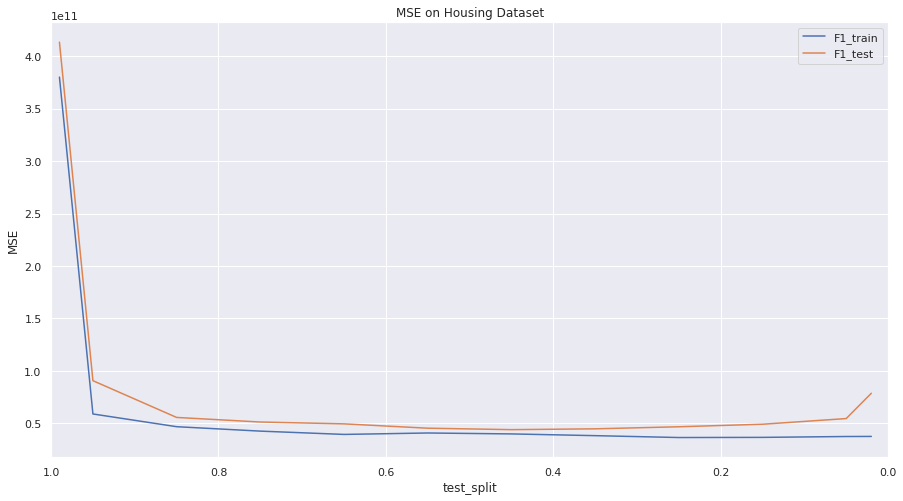

In [58]:
learningCurveDT(x_train_cluster, y_train_house, finalmodel)

In [59]:
#RPSVD Score final model
start = time.time()
model = finalmodel()
model.fit(x_train_cluster, y_train_house, epochs=80, batch_size=64,  verbose=0)
end = time.time()
print(end-start, "time")
y_pred = model.predict(x_test_cluster)
y_train_pred = model.predict(x_train_cluster)
f1_val_ne = mean_squared_error(y_test_house, y_pred)
train_auc_val = mean_squared_error(y_train_house, y_train_pred)
print(f1_val_ne, "test")
print(train_auc_val, 'train')

15.972484588623047 time
49189465407.902725 test
38401213351.54952 train


## GMM cluster Nn


In [ ]:
## Gridsearch
# defaultRun = defaultDataCorr.copy()


# defaultPred = defaultRun['default payment next month']
# defaultRun.drop(['default payment next month'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(defaultRun, defaultPred, test_size=0.1, random_state=1, shuffle = True)

In [ ]:
search_result = run_randomGrid(X_train, y_train)
print(search_result.best_params_)
print(search_result.best_estimator_.score)
print(search_result.best_score_)

{'max_depth': 3, 'criterion': 'gini', 'ccp_alpha': 3.333333333333334e-05}
<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=3.333333333333334e-05, class_weight=None,
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')>
0.4733288263903169


(0.675677068427658, 0.6855461357642265)
(0.6980007315907599, 0.6855845797401712)
(0.6891829638010082, 0.6853926062281082)
(0.6821241646442329, 0.6863980855128663)
(0.6837935019655572, 0.6862774194774798)
(0.6887627095930641, 0.6858638530626913)
(0.6757372613287248, 0.6875395728665902)
(0.6818106060871993, 0.6868226483696506)
(0.6802008435436663, 0.683339947245384)
(0.6869072829422025, 0.6855454539165624)
(0.6817919617092375, 0.680649633058345)
(0.6773190191834931, 0.6853304658161086)
(0.6771777810184885, 0.6784003136705014)
(0.6788616624854709, 0.6780865638271802)
(0.6767462507787512, 0.6792386060449148)
(0.6769363549377803, 0.6779056591329138)
(0.6801391697684932, 0.6886019658939998)
(0.6743063900108466, 0.6847670277053006)
(0.6697908120111047, 0.6739386573328033)
(0.6784969237859357, 0.6861080981352329)
(0.6725697426227247, 0.6871176435958195)
(0.6521852821089137, 0.6792619542334812)
(0.6679089372054795, 0.7295916876673095)
(0.6361124465551186, 0.7663875873249919)
(0.6075851590533545

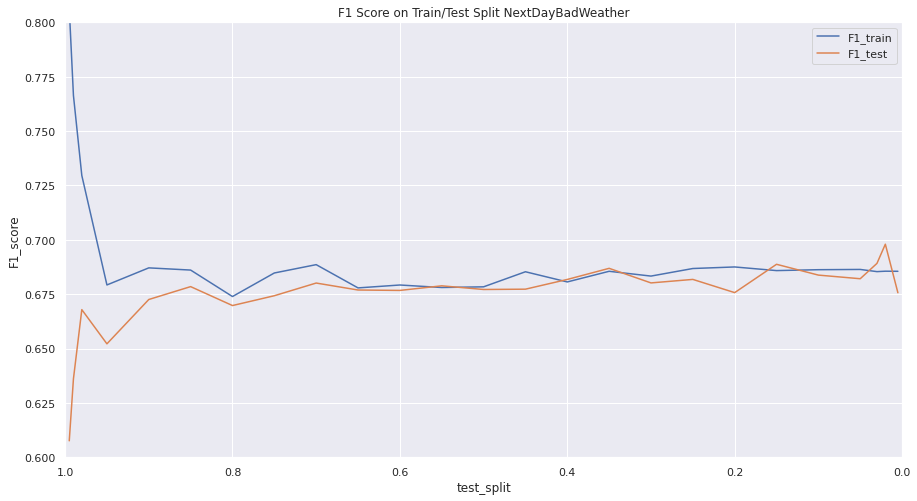

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=3.333333333333334e-05, class_weight=None,
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None)
learningCurveDT(X_train,y_train, model)

In [ ]:
def createTuner():
  path=DecisionTreeClassifier(criterion='gini',random_state=1).cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas, impurities = path.ccp_alphas, path.impurities
  values = []
  ccp_alpha_upper = 6.942646123011841e-05 * 1.2
  ccp_alpha_lower = 6.942646123011841e-05 / 1.2
  value = min(range(len(ccp_alphas)), key=lambda i: abs(ccp_alphas[i]-3.333333333333334e-05))
  min_range = value - 300
  max_range = value + 600

  values = ccp_alphas[value:max_range:3]
  print(ccp_alphas)
  # values = [ val if (val >= ccp_alpha_lower and val <=ccp_alph_upper ) for val in ccp_alphas]
  print(len(ccp_alphas))
  print(len(values))
  return values

[0.00000000e+00 5.43209877e-06 6.17283951e-06 ... 3.30214463e-03
 1.07222726e-02 5.15228109e-02]
1697
200
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
max alphas index
52
3.561253561253564e-05
(0.6226589805639329, 0.9991010101013816)


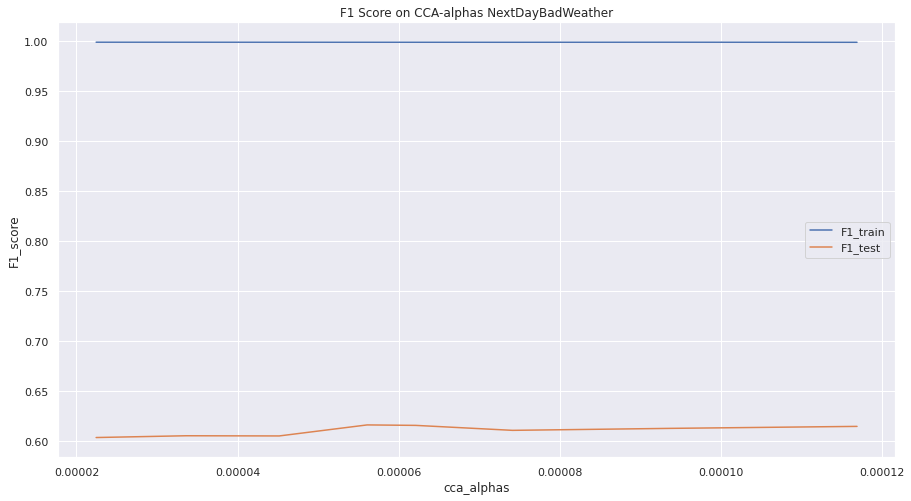

In [ ]:
# createTuner()
alphaTuning(X_train, y_train)

sds


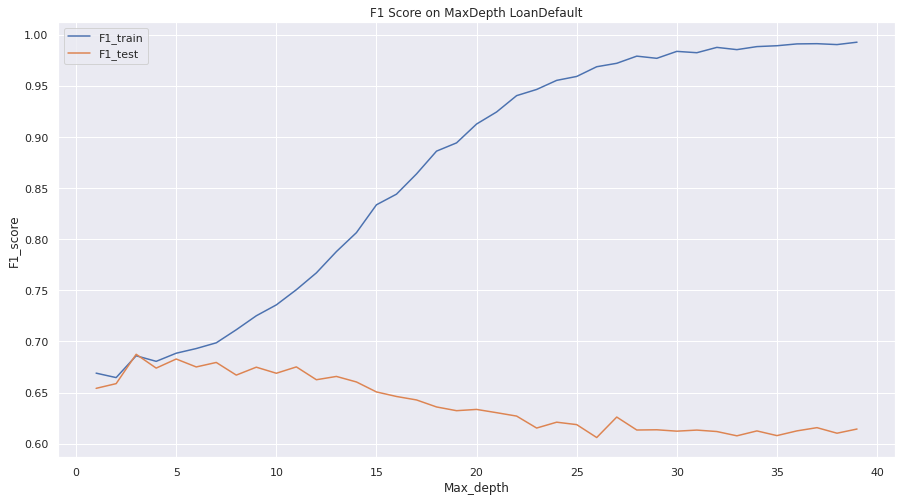

In [ ]:
#improve the bias of the decision tree
def maxDepthExp(X,Y):
  max_depth = []
  acc_gini = []
  acc_entropy = []
  for i in range(1,40):
    model = DecisionTreeClassifier(ccp_alpha=3.561253561253564e-05, class_weight=None,
                        criterion='gini', max_depth=i, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None)
    auc = get_acc_auc_randomisedCV(X, Y, model, test_percent=0.1)
    acc_entropy.append(auc)
    max_depth.append(i)

  d = pd.DataFrame({'F1_train':pd.Series(list(zip(*acc_entropy))[1]),
    'F1_test':pd.Series(list(zip(*acc_entropy))[0]),
  'max_depth':pd.Series(max_depth)})
  print("sds")
  plt.figure(figsize=(15,8))
  plt.title("F1 Score on MaxDepth LoanDefault")
  plt.plot('max_depth','F1_train', data=d, label='F1_train')
  plt.plot('max_depth','F1_test', data=d, label='F1_test')
  plt.xlabel('Max_depth')
  plt.ylabel('F1_score')
  # plt.ylim([0.6,1.1])
  plt.legend()

maxDepthExp(X_train, y_train)

(0.6283034417752409, 0.6857842938361229)
(0.6759217473546347, 0.6855474908733942)
(0.6770214105374776, 0.6866361692431494)
(0.6979356527837053, 0.6858154759848154)
(0.6879621997668003, 0.6856105392229869)
(0.6807338080336284, 0.6869414555199552)
(0.6847656509033829, 0.6861673533310273)
(0.6831664318144995, 0.6868340076965926)
(0.6811322065002384, 0.6859820524507542)
(0.6878675161746309, 0.6846869226954738)
(0.6779121221039022, 0.6865626677046974)
(0.6826240340948928, 0.6894456153822562)
(0.6832152840793744, 0.6878898810092992)
(0.6783512439699354, 0.6851719797467127)
(0.6786204638431929, 0.6832031309266036)
(0.6817506210138294, 0.6902456711330694)
(0.6782187623608582, 0.6882139026749422)
(0.6672467502506845, 0.6745141193039608)
(0.673157628825092, 0.6795053516635093)
(0.6746563656078723, 0.6854216645088459)
(0.6738772673373502, 0.687797186710257)
(0.6682697739147748, 0.6963090365210756)
(0.6585801185383836, 0.715598407924216)
(0.6519347992841665, 0.7584303719519908)
(0.628425936551629,

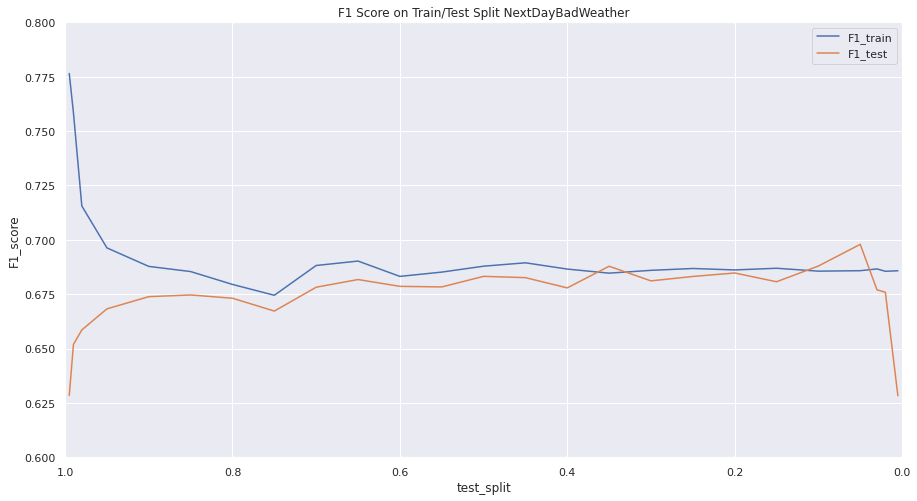

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=3.561253561253564e-05, class_weight=None,
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None)
learningCurveDT(X_train,y_train, model)

In [ ]:
#perform testing on test data

model = DecisionTreeClassifier(ccp_alpha=3.561253561253564e-05, class_weight=None,
                       criterion='gini', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
start = timer()
model.fit(X_train, y_train)
end = timer()
y_pred = model.predict(X_test)
f1_val = f1_score(y_test, y_pred, average='macro')
print(f1_val, end - start)

0.7075610404458382 0.16744782400007807


In [ ]:
# X_test.shape

(3000, 33)